In [1]:
# This is a magic line that makes matplotlib plots appear in the notebook,
# not in a separate window
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
# These imports are actually NOT NEEDED if you already know the name of
# the ttree within the root file.
import math
from math import exp, pi
from ROOT import TFile, TTree

import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plot
import matplotlib.axes as axes
from matplotlib.colors import LogNorm

import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.mlab as mlab
from pylab import rcParams
#import seaborn as sns
#sns.set()


from root_numpy import root2array, tree2array,testdata
from root_pandas import read_root
from glob import glob
from matplotlib.colors import LogNorm
from scipy.interpolate import interp1d
from scipy.misc import factorial

Welcome to JupyROOT 6.12/06


In [2]:
plt.rcParams.update({'font.size': 18})

In [3]:
#NUSELECTION = 'Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers==0 and muon_pz>0.8 and neutrinotracks>1'
NUSELECTION = 'Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers==0 and neutrinotracks>1 and cosmic_trk_50==0'# and tracklength>20 and distance_nu_smallest>15'# '
NUSELECTION_rand='_rand_vtx_x>50.0 and _rand_vtx_x<206.35 and _rand_vtx_y>-66.5 and _rand_vtx_y<66.5 and _rand_vtx_z>50.0 and _rand_vtx_z<886.8 and neutrinoshowers==0 and neutrinotracks>1 and cosmic_trk_50==0'# and tracklength>20 and distance_nu_smallest>15'# '

In [4]:
myfile_beam_on= '/uboone/data/users/abhat/GammaCatcher/data_bnb_optfilter_C1_5e19_goodruns_v08_00_00_12_reco2_hadd.root'
myfile_beam_off= '/uboone/data/users/abhat/GammaCatcher/data_extbnb_mcc9.0_v08_00_00_12_run1_reco2_hadd.root'
myfile_MC='/uboone/data/users/abhat/GammaCatcher/prodgenie_bnb_nu_uboone_overlay_mcc9_postCSU_v08_00_00_12_run1_reco2_hadd.root'
myfile_NO_overlay='/uboone/data/users/abhat/GammaCatcher/prodgenie_bnb_nu_corsika_SCE_genie2_v08_00_00_12_reco2_hadd.root'
myfile_beam_on_cone='/uboone/data/users/abhat/GammaCatcher/data_bnb_optfilter_C1_5e19_goodruns_v08_00_00_12_reco2_cone_hadd.root'
myfile_beam_off_cone='/uboone/data/users/abhat/GammaCatcher/data_extbnb_mcc9.0_v08_00_00_12_run1_reco2_cone_hadd.root'
myfile_MC_cone='/uboone/data/users/abhat/GammaCatcher/prodgenie_bnb_nu_uboone_overlay_mcc9_postCSU_v08_00_00_12_run1_reco2_cone_hadd.root'
#myfile_beam_off_cone='/uboone/data/users/abhat/GammaCatcher/low_threshold_correlation_v04_00.root'

In [5]:
BRANCH_EVT = '/gammacorrelation/Event_Correlationtree'
BRANCH_SPS = '/gammacorrelation/Sps_Correlationtree'

In [6]:
##MCC9 BEAM ON DATA

df_Event_beam_on = pd.DataFrame( root2array( myfile_beam_on,BRANCH_EVT) )
df_Sps_beam_on = pd.DataFrame( root2array( myfile_beam_on,BRANCH_SPS) )

df_Event_beam_on = df_Event_beam_on.query(NUSELECTION)
df_Sps_beam_on = df_Sps_beam_on.query(NUSELECTION)



print df_Event_beam_on.shape[0]
print df_Sps_beam_on.shape[0]

2934
104039


In [7]:
##MCC9 BEAM ON DATA (CONE CUT APPLIED)

df_Event_beam_on_cone = pd.DataFrame( root2array( myfile_beam_on_cone,BRANCH_EVT) )
df_Sps_beam_on_cone = pd.DataFrame( root2array( myfile_beam_on_cone,BRANCH_SPS) )

df_Event_beam_on_cone = df_Event_beam_on_cone.query(NUSELECTION)
df_Sps_beam_on_cone = df_Sps_beam_on_cone.query(NUSELECTION)



print df_Event_beam_on_cone.shape[0]
print df_Sps_beam_on_cone.shape[0]

2934
142852


In [8]:
##MCC9 BEAM OFF DATA (CONE CUT APPLIED)

df_Event_beam_off_cone = pd.DataFrame( root2array( myfile_beam_off_cone,BRANCH_EVT) )
df_Sps_beam_off_cone = pd.DataFrame( root2array( myfile_beam_off_cone,BRANCH_SPS) )

df_Event_beam_off_cone = df_Event_beam_off_cone.query(NUSELECTION)
df_Sps_beam_off_cone = df_Sps_beam_off_cone.query(NUSELECTION)
df_Sps_beam_off_cone_rand = df_Sps_beam_off_cone.query(NUSELECTION_rand)
df_Event_beam_off_cone_rand = df_Event_beam_off_cone.query(NUSELECTION_rand)


print df_Event_beam_off_cone.shape[0]
print df_Sps_beam_off_cone.shape[0]

4906
226789


In [9]:
##MCC9 BEAM OFF DATA
df_Event_beam_off = pd.DataFrame( root2array( myfile_beam_off,BRANCH_EVT) )
df_Sps_beam_off = pd.DataFrame( root2array( myfile_beam_off,BRANCH_SPS) )

df_Event_beam_off = df_Event_beam_off.query(NUSELECTION)
df_Sps_beam_off = df_Sps_beam_off.query(NUSELECTION)
df_Sps_beam_off_rand = df_Sps_beam_off.query(NUSELECTION_rand)
df_Event_beam_off_rand = df_Event_beam_off.query(NUSELECTION_rand)
print df_Event_beam_off.shape[0]
print df_Sps_beam_off.shape[0]

6719
224402


In [10]:
df_Event_beam_off.head()

,Vertex_x,Vertex_y,Vertex_z,_rand_vtx_x,_rand_vtx_y,_rand_vtx_z,distance_smallest,N_sps,Event_cluster_charge,distance_smallest_rand_vtx,...,neutrinos,neutrinoshowers,neutrinotracks,muon_px,muon_py,muon_pz,maxTrkLen,tracklength,distance_nu_smallest,cosmic_trk_50
123,50.736229,34.012054,140.732407,205.915518,108.694428,1029.714475,171.254106,35,64.323151,225.648718,...,1,0,2,0.405883,0.565818,0.717711,46.294479,220.882754,53.664114,0
287,174.006973,33.321770,175.874100,130.298403,-111.001526,692.914777,41.675344,35,209.511719,95.759940,...,1,0,2,-0.620136,0.727982,0.292360,122.760521,252.827743,71.448426,0
369,124.993134,22.751949,822.439514,222.423300,-115.129269,170.821700,53.597111,29,436.400787,110.591970,...,1,0,2,0.442101,0.708182,0.550477,128.071304,279.254395,53.546865,0
437,77.790878,61.368835,865.256897,5.378368,76.969067,111.802228,35.065515,29,999.033081,78.483473,...,1,0,2,0.251237,0.965695,0.065674,7.329224,262.557799,85.644154,0
693,152.955750,51.123539,332.561890,159.455823,112.208180,453.936223,46.077448,40,124.343140,38.382623,...,1,0,2,0.406014,0.436237,0.803025,91.458534,257.010891,54.469488,0


In [11]:
df_Sps_beam_off.head()

,sps_x,sps_y,sps_z,distance,sps_cluster_charge,N_Event,N_Run,N_SubRun,Vertex_x,Vertex_y,...,neutrinos,neutrinoshowers,neutrinotracks,muon_px,muon_py,muon_pz,maxTrkLen,tracklength,distance_nu_smallest,cosmic_trk_50
3671,203.108490,-95.072220,32.700001,227.048577,49.118141,3058,7499,61,50.736229,34.012054,...,1,0,2,0.405883,0.565818,0.717711,46.294479,220.882754,53.664114,0
3672,175.091888,-100.528175,75.757126,194.389276,68.935959,3058,7499,61,50.736229,34.012054,...,1,0,2,0.405883,0.565818,0.717711,46.294479,220.882754,53.664114,0
3673,250.604630,-100.614777,158.699997,241.649737,102.842178,3058,7499,61,50.736229,34.012054,...,1,0,2,0.405883,0.565818,0.717711,46.294479,220.882754,53.664114,0
3674,253.192886,-96.457855,161.403061,241.740297,457.495514,3058,7499,61,50.736229,34.012054,...,1,0,2,0.405883,0.565818,0.717711,46.294479,220.882754,53.664114,0
3675,68.757698,-111.873108,228.600006,171.254106,64.323151,3058,7499,61,50.736229,34.012054,...,1,0,2,0.405883,0.565818,0.717711,46.294479,220.882754,53.664114,0


In [12]:
##MCC9 MC


df_Event_MC = pd.DataFrame( root2array( myfile_MC,BRANCH_EVT) )
df_Sps_MC = pd.DataFrame( root2array( myfile_MC,BRANCH_SPS ) )

df_Event_MC = df_Event_MC.query(NUSELECTION)
df_Sps_MC = df_Sps_MC.query(NUSELECTION)
df_Sps_MC_rand = df_Sps_MC.query(NUSELECTION_rand)

print df_Event_MC.shape[0]
print df_Sps_MC.shape[0]
df_POT_MC = pd.DataFrame( root2array( myfile_MC,'/gammacorrelation/potTree' ) )

32178
1212946


In [13]:
##MCC9 MC CONE


df_Event_MC_cone = pd.DataFrame( root2array( myfile_MC_cone,BRANCH_EVT) )
df_Sps_MC_cone = pd.DataFrame( root2array( myfile_MC_cone,BRANCH_SPS ) )

df_Event_MC_cone = df_Event_MC_cone.query(NUSELECTION)
df_Sps_MC_cone = df_Sps_MC_cone.query(NUSELECTION)
df_Sps_MC_cone_rand = df_Sps_MC_cone.query(NUSELECTION_rand)

print df_Event_MC_cone.shape[0]
print df_Sps_MC_cone.shape[0]
df_POT_MC_cone = pd.DataFrame( root2array( myfile_MC_cone,'/gammacorrelation/potTree' ) )

32192
1627572


In [14]:
##MC NO OVERLAY
df_Event_NO_overlay = pd.DataFrame( root2array( myfile_NO_overlay,BRANCH_EVT) )
df_Sps_NO_overlay = pd.DataFrame( root2array( myfile_NO_overlay,BRANCH_SPS ) )

df_Event_MC = df_Event_MC.query(NUSELECTION)
df_Sps_MC = df_Sps_MC.query(NUSELECTION)
df_Sps_NO_overlay_rand = df_Sps_NO_overlay.query(NUSELECTION_rand)

print df_Event_NO_overlay.shape[0]
print df_Sps_NO_overlay.shape[0]
df_POT_NO_overlay = pd.DataFrame( root2array( myfile_NO_overlay,'/gammacorrelation/potTree' ) )

40240
601756


In [15]:
print(len(df_Event_MC))

32178


In [16]:
POT = np.sum(df_POT_MC['sr_pot'].values)
print POT

8.377034103396978e+20


In [17]:
POT_cone = np.sum(df_POT_MC_cone['sr_pot'].values)
print POT_cone

8.381223749964859e+20


In [18]:
#off-beam scaling factor
off_scaling=0.15604045084
#MC scaling factor
MC_scaling=0.05389735727
#True
off_scaling_cone=0.15456674775
#MC_scaling_cone=0.0533812261


#Jugaad
MC_scaling_cone=0.0621211

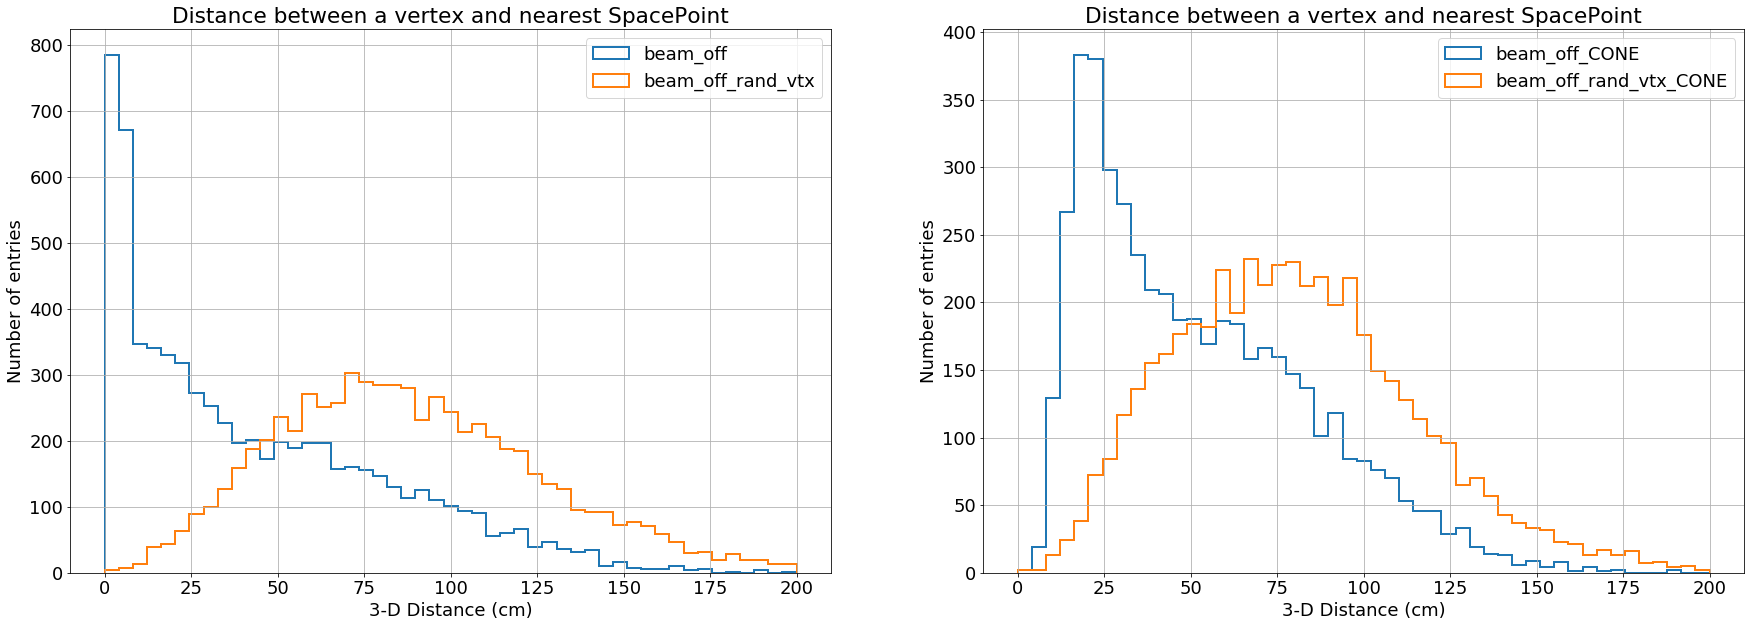

In [19]:

#MicroBooNE coordinates : x[0,256.35], y[-116.5,116.5], z[0,1036.8]
df_vertex_cut_beam_on_no_boundary_cut= df_Event_beam_on.query('distance_smallest<1e10')
df_vertex_cut_beam_off_no_boundary_cut= df_Event_beam_off.query('distance_smallest<1e10')


BINS = np.linspace(0,200,50)

fig = plt.figure(figsize=(30,10))
plt.subplot(1, 2, 1)
plt.hist(df_Event_beam_off['distance_smallest'].values,bins=BINS,histtype='step',lw=2,label='beam_off')
plt.hist(df_Event_beam_off['distance_smallest_rand_vtx'].values,bins=BINS,histtype='step',lw=2,label='beam_off_rand_vtx')

plt.legend(loc=1)

plt.grid()
plt.title("Distance between a vertex and nearest SpacePoint")
plt.xlabel('3-D Distance (cm)')
plt.ylabel('Number of entries')

plt.subplot(1, 2, 2)
plt.hist(df_Event_beam_off_cone['distance_smallest'].values,bins=BINS,histtype='step',lw=2,label='beam_off_CONE')
plt.hist(df_Event_beam_off_cone['distance_smallest_rand_vtx'].values,bins=BINS,histtype='step',lw=2,label='beam_off_rand_vtx_CONE')

plt.legend(loc=1)

plt.grid()
plt.title("Distance between a vertex and nearest SpacePoint")
plt.xlabel('3-D Distance (cm)')
plt.ylabel('Number of entries')
plt.show()
#plt.draw()
#fig.savefig('distance_smallest', dpi=500)

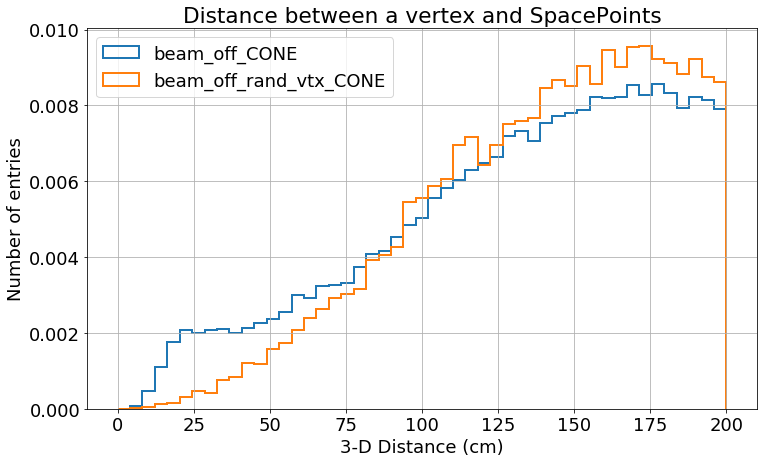

In [20]:
BINS = np.linspace(0,200,50)

fig = plt.figure(figsize=(12,7))

plt.hist(df_Sps_beam_off_cone['distance'].values,bins=BINS,histtype='step',lw=2,label='beam_off_CONE',density=True)
plt.hist(df_Sps_beam_off_cone_rand['distance_rand_vtx'].values,bins=BINS,histtype='step',lw=2,label='beam_off_rand_vtx_CONE',density=True)

plt.legend(loc=2)

plt.grid()
plt.title("Distance between a vertex and SpacePoints")
plt.xlabel('3-D Distance (cm)')
plt.ylabel('Number of entries')
plt.show()

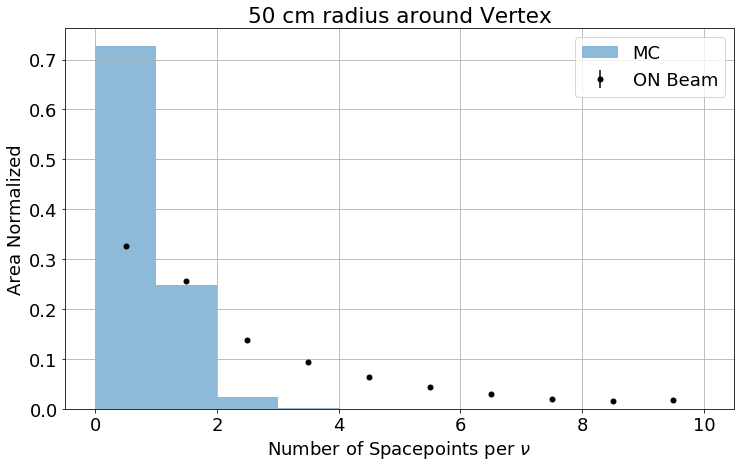

<Figure size 432x288 with 0 Axes>

In [21]:
fig = plt.figure(figsize=(12,7))
BINS = np.linspace(0,10,11)


LABELS = ['MC']

xstacked = [df_Event_MC['N_sps10'].values]
plt.hist(xstacked,bins=BINS,histtype='stepfilled',stacked=True,label=LABELS,alpha=0.5,density=True)
vals,bine = np.histogram(df_Event_MC['N_sps50'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
binw = (bine[1]-bine[0])
vals = vals.astype(float)
errs = np.sqrt(vals)
vals_rweighted = vals
errs_rweighted = errs
vals_reweighted = vals_rweighted/(binw*(np.sum(vals)))
errs_reweighted = errs_rweighted/(binw*(np.sum(vals)))

plt.errorbar(binc,vals_reweighted,yerr=errs_reweighted,fmt='o',color='k',markersize=5,label='ON Beam')

plt.title("50 cm radius around Vertex")
plt.xlabel('Number of Spacepoints per $\\nu$')
plt.ylabel('Area Normalized')
plt.legend(loc=1)
plt.grid()
plt.show()
plt.draw()
fig.savefig('distance_50cm', dpi=400)

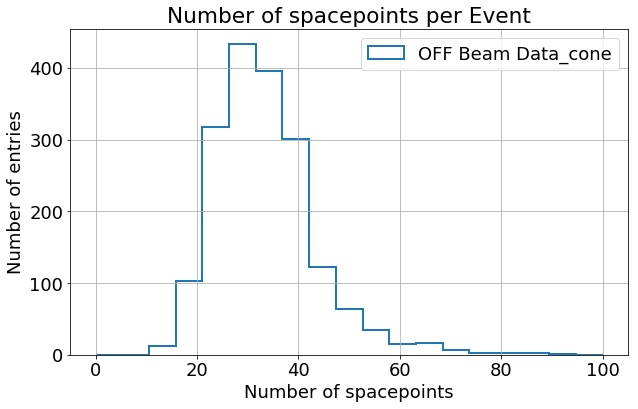

<Figure size 432x288 with 0 Axes>

In [22]:
BINS = np.linspace(0,100,20)

fig = plt.figure(figsize=(10,6))
plt.hist(df_Event_beam_off_rand['N_sps'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data_cone')

plt.title("Number of spacepoints per Event")
plt.xlabel('Number of spacepoints')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1)
plt.show()
plt.draw()
fig.savefig('N_density', dpi=300)




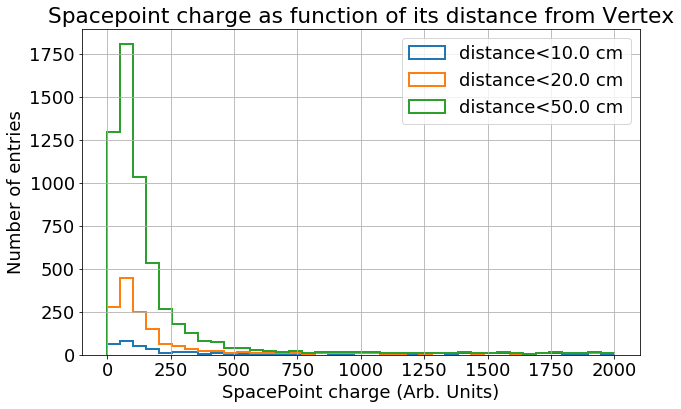

In [23]:
df_distance_Cut10 = df_Sps_beam_on.query('distance<10.0')
df_distance_Cut20 = df_Sps_beam_on.query('distance<20.0')
df_distance_Cut50 = df_Sps_beam_on.query('distance<50.0')
BINS = np.linspace(0,2000,40)
fig = plt.figure(figsize=(10,6))
plt.hist(df_distance_Cut10['sps_cluster_charge'].values,bins=BINS,histtype='step',lw=2,label='distance<10.0 cm')
plt.hist(df_distance_Cut20['sps_cluster_charge'].values,bins=BINS,histtype='step',lw=2,label='distance<20.0 cm')
plt.hist(df_distance_Cut50['sps_cluster_charge'].values,bins=BINS,histtype='step',lw=2,label='distance<50.0 cm')
plt.title("Spacepoint charge as function of its distance from Vertex")
plt.xlabel('SpacePoint charge (Arb. Units)')
plt.ylabel('Number of entries')
#plt.yscale('log')
plt.grid()
plt.legend(loc=1)


In [24]:
BINS = np.linspace(0,1100,110)

nOFF_Sps = len(df_Sps_beam_off)
weightsOFF_Sps = np.ones(nOFF_Sps) * off_scaling # factor needed to scale off-beam to on-beam

nOFF_Sps_cone = len(df_Sps_beam_off_cone)
weightsOFF_Sps_cone = np.ones(nOFF_Sps_cone) * off_scaling_cone # factor needed to scale off-beam to on-beam


nMC_Sps = len(df_Sps_MC)
weightsMC_Sps = np.ones(nMC_Sps) * MC_scaling # factor needed to scale MC to on-beam

nMC_Sps_cone = len(df_Sps_MC_cone)
weightsMC_Sps_cone = np.ones(nMC_Sps_cone) * MC_scaling_cone # factor needed to scale MC to on-beam

nON_Sps  = len(df_Sps_beam_on)
weightsON_Sps  = np.ones(nON_Sps)  * 1


nOFF_Event = len(df_Event_beam_off)
weightsOFF_Event = np.ones(nOFF_Event) * off_scaling # factor needed to scale off-beam to on-beam

nOFF_Event_cone = len(df_Event_beam_off_cone)
weightsOFF_Event_cone = np.ones(nOFF_Event_cone) * off_scaling_cone # factor needed to scale off-beam to on-beam

nMC_Event = len(df_Event_MC)
weightsMC_Event = np.ones(nMC_Event) * MC_scaling # factor needed to scale MC to on-beam

nMC_Event_cone = len(df_Event_MC_cone)
weightsMC_Event_cone = np.ones(nMC_Event_cone) * MC_scaling_cone # factor needed to scale MC to on-beam


nON_Event  = len(df_Event_beam_on)
weightsON_Event  = np.ones(nON_Event)  * 1


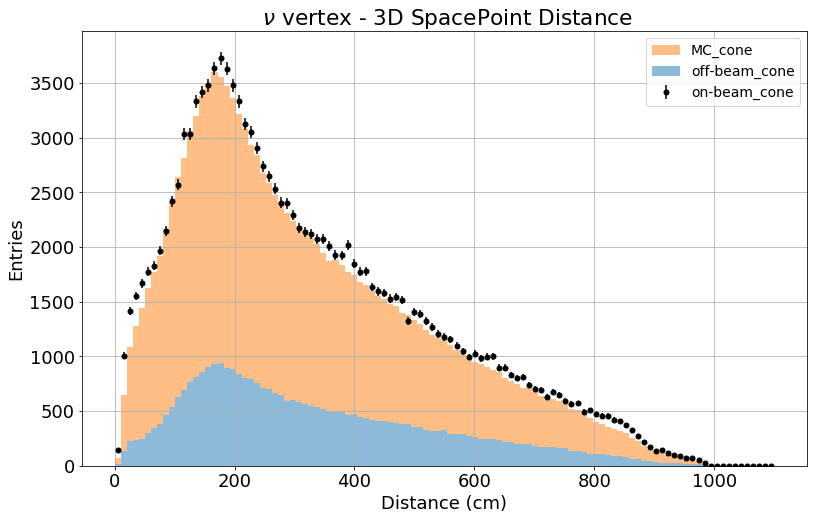

In [25]:
BINS = np.linspace(0,1100,110)


WEIGHTS_Sps_cone = [weightsOFF_Sps_cone,weightsMC_Sps_cone]
fig = plt.figure(figsize=(13,8))
#plt.rcParams.update({'font.size': 18})

xstacked = [df_Sps_beam_off_cone['distance'].values,df_Sps_MC_cone['distance'].values]
LABELS = ['off-beam_cone','MC_cone']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Sps_cone,stacked=True,alpha=0.5)
vals,bine = np.histogram(df_Sps_beam_on_cone['distance'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='on-beam_cone')
plt.grid()
plt.xlabel('Distance (cm)')
plt.ylabel('Entries')
plt.title(" $\\nu$ vertex - 3D SpacePoint Distance")
plt.legend(loc=1,fontsize=14)
plt.show()




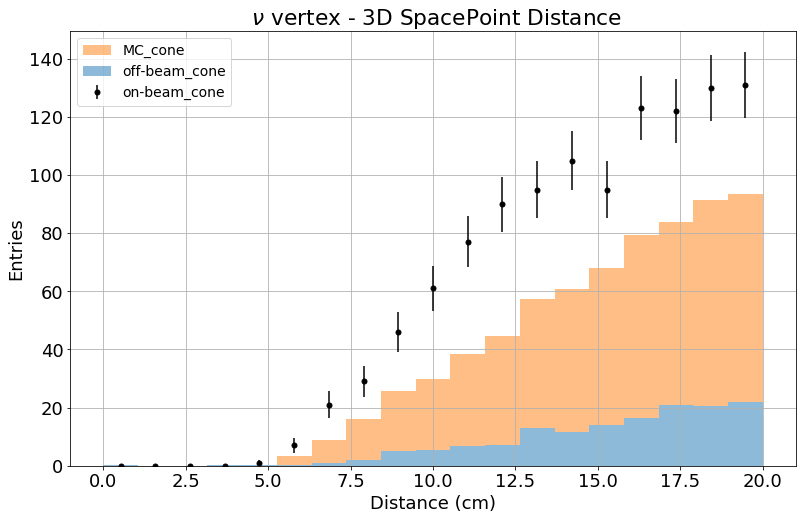

<Figure size 432x288 with 0 Axes>

In [26]:
BINS = np.linspace(0,20,20)



fig = plt.figure(figsize=(13,8))
#plt.rcParams.update({'font.size': 18})

xstacked = [df_Sps_beam_off_cone['distance'].values,df_Sps_MC_cone['distance'].values]
LABELS = ['off-beam_cone','MC_cone']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Sps_cone,stacked=True,alpha=0.5)
vals,bine = np.histogram(df_Sps_beam_on_cone['distance'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='on-beam_cone')
plt.grid()
plt.xlabel('Distance (cm)')
plt.ylabel('Entries')
plt.title(" $\\nu$ vertex - 3D SpacePoint Distance")
plt.legend(loc=2,fontsize=14)
plt.show()
plt.draw()



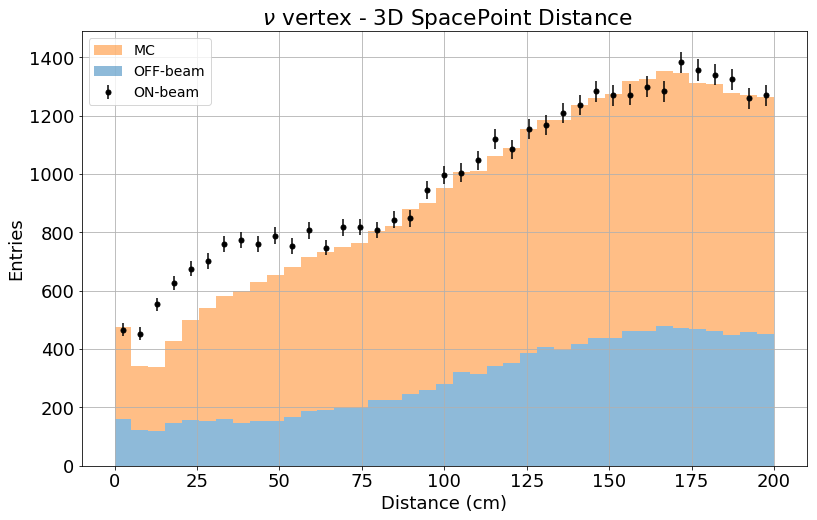

<Figure size 432x288 with 0 Axes>

In [27]:
BINS = np.linspace(0,200,40)


WEIGHTS_Sps = [weightsOFF_Sps,weightsMC_Sps]
fig = plt.figure(figsize=(13,8))
#plt.rcParams.update({'font.size': 18})

xstacked = [df_Sps_beam_off['distance'].values,df_Sps_MC['distance'].values]
LABELS = ['OFF-beam','MC']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Sps,stacked=True,alpha=0.5)
vals,bine = np.histogram(df_Sps_beam_on['distance'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON-beam')
plt.grid()
plt.xlabel('Distance (cm)')
plt.ylabel('Entries')
plt.title(" $\\nu$ vertex - 3D SpacePoint Distance")
plt.legend(loc=2,fontsize=14)
plt.show()
plt.draw()


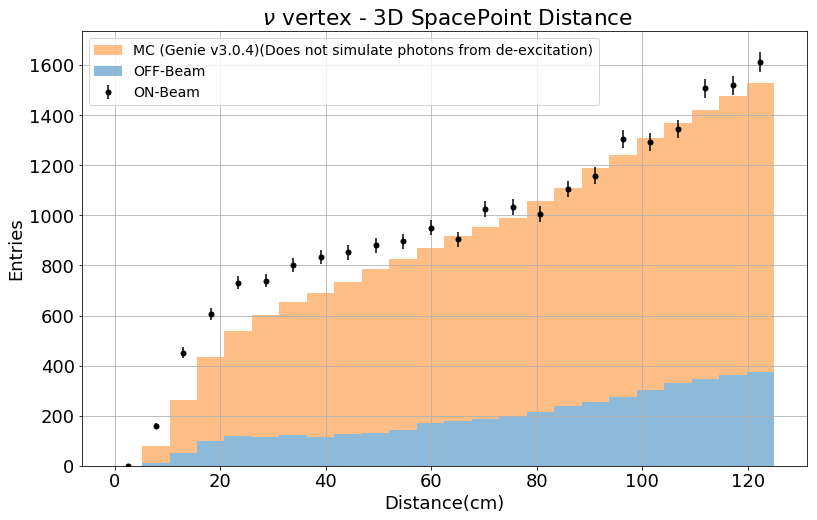

<Figure size 432x288 with 0 Axes>

In [28]:
BINS = np.linspace(0,125,25)


WEIGHTS_Sps_cone = [weightsOFF_Sps_cone,weightsMC_Sps_cone]
fig = plt.figure(figsize=(13,8))
#plt.rcParams.update({'font.size': 18})

xstacked = [df_Sps_beam_off_cone['distance'].values,df_Sps_MC_cone['distance'].values]
LABELS = ['OFF-Beam','MC (Genie v3.0.4)(Does not simulate photons from de-excitation)']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Sps_cone,stacked=True,alpha=0.5)
vals,bine = np.histogram(df_Sps_beam_on_cone['distance'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON-Beam')
plt.grid()
plt.xlabel('Distance(cm)')
plt.ylabel('Entries')
plt.title(" $\\nu$ vertex - 3D SpacePoint Distance")
plt.legend(loc=2,fontsize=14)
plt.show()
plt.draw()
fig.savefig('distance_', dpi=400)

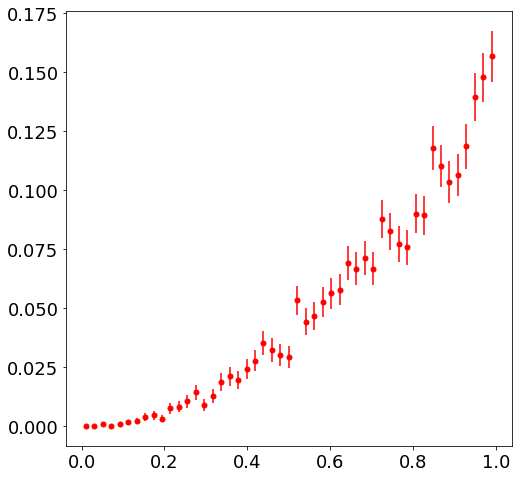

In [29]:
BINS = np.linspace(0,1.,50)
df_rand_SPS_beam_off_boundary_cut50= df_Sps_beam_off_cone_rand.query(NUSELECTION_rand)


fig = plt.figure(figsize=(8,8))
binv, bine = np.histogram(df_Sps_beam_off_cone_rand['distance_rand_vtx'].values/100.,bins=BINS)
binc = (0.5)*(bine[1:]+bine[:-1])
binv = binv.astype(float) 
errors = np.sqrt(binv)
NEVTS = df_Event_beam_off_cone_rand.shape[0]
binv /= NEVTS
errors /= NEVTS
plt.errorbar(binc,binv,yerr=errors,fmt='o',color='r',markersize=5)

plt.show()


BINWIDTH = binc[1]-binc[0]


In [30]:
def fun(x,c):
    return 4*pi*x*x*c*BINWIDTH
f2 = np.vectorize(fun)
fun(1.,1)

0.25645654315018723

In [31]:
guess = [0.45]

In [32]:
xvals = np.linspace(bine[0],bine[-1],100)

In [33]:
popt,popv = curve_fit(f2,binc,binv,p0=guess)

In [34]:
print popt

[0.57178819]


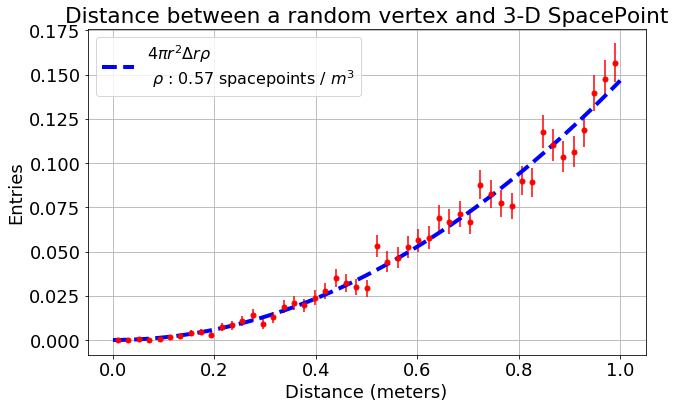

In [35]:
fig = plt.figure(figsize=(10,6))
plt.errorbar(binc,binv,yerr=errors,fmt='o',color='r',markersize=5)
plt.plot(xvals,f2(xvals,*popt),'b--',lw=4,label='$4 \pi r^2 \Delta r \\rho $ \n $\\rho$ : %.02f spacepoints / $m^3$'%(popt[0]))
plt.grid()
plt.xlabel('Distance (meters)')
plt.ylabel('Entries')
plt.title("Distance between a random vertex and 3-D SpacePoint")
plt.legend(loc=2,fontsize=16)
plt.show()


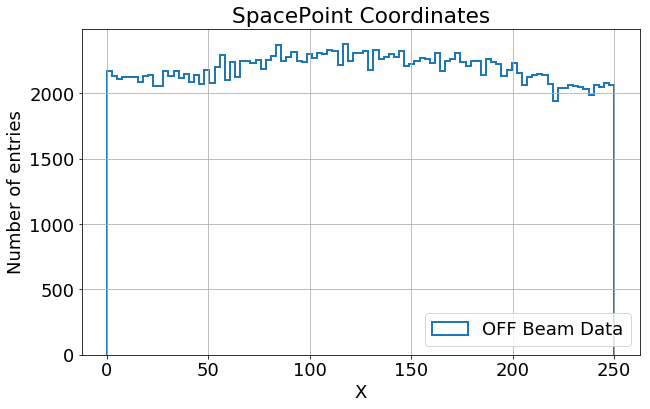

In [36]:
BINS = np.linspace(0,250,100)

fig = plt.figure(figsize=(10,6))
plt.hist(df_Sps_beam_off['sps_x'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data')

plt.title("SpacePoint Coordinates")
plt.xlabel('X')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=4)
plt.show()

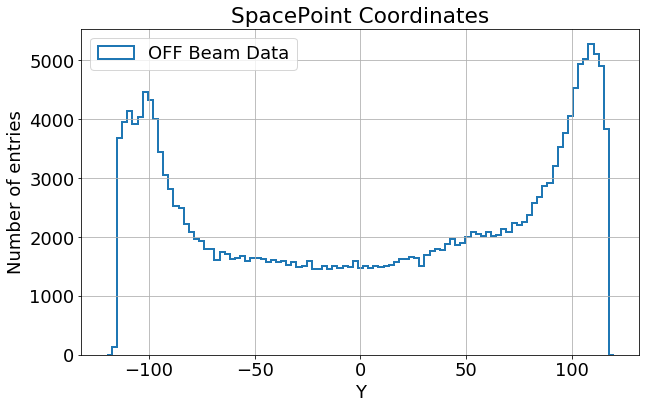

In [37]:
BINS = np.linspace(-120,120,100)

fig = plt.figure(figsize=(10,6))
plt.hist(df_Sps_beam_off['sps_y'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data')

plt.title("SpacePoint Coordinates")
plt.xlabel('Y')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=2)
plt.show()

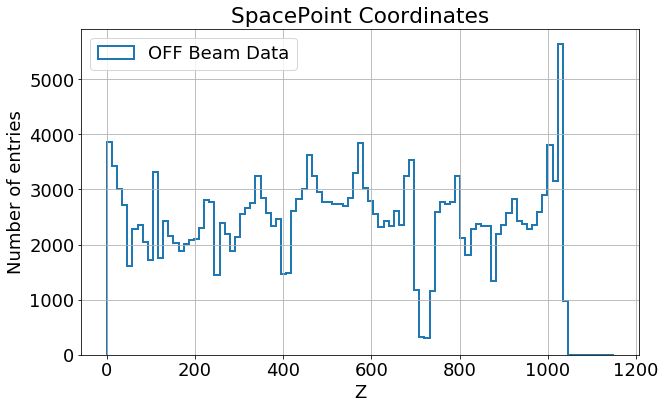

In [38]:
BINS = np.linspace(0,1150,100)

fig = plt.figure(figsize=(10,6))
plt.hist(df_Sps_beam_off['sps_z'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data')

plt.title("SpacePoint Coordinates")
plt.xlabel('Z')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=2)
plt.show()

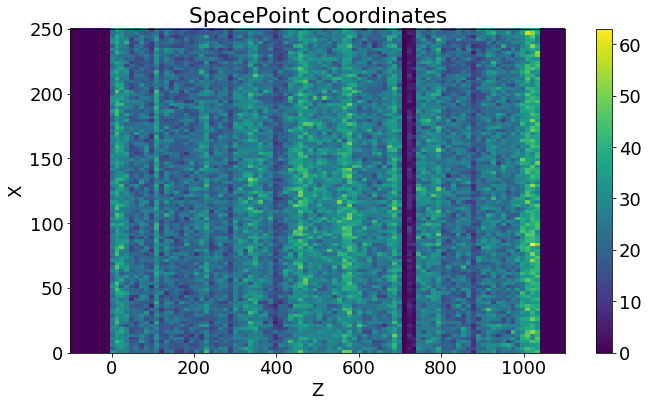

In [39]:
fig = plt.figure(figsize=(10,6))

plt.hist2d(df_Sps_beam_off['sps_z'].values,df_Sps_beam_off['sps_x'].values,bins=(100,100), range=[[-100,1100], [0,250]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SpacePoint Coordinates")
plt.xlabel('Z')
plt.ylabel('X')

plt.tight_layout()
plt.show()

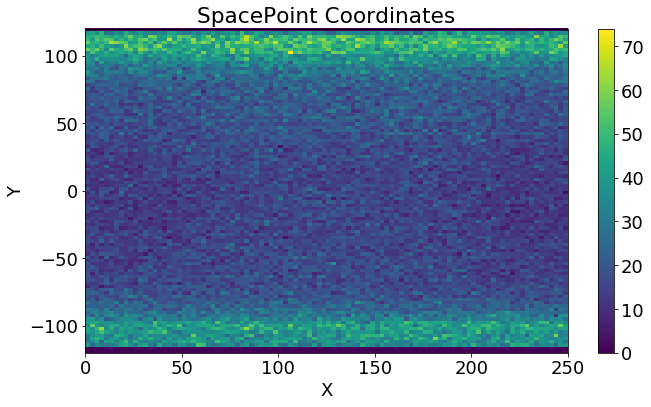

In [40]:
fig = plt.figure(figsize=(10,6))
plt.hist2d(df_Sps_beam_off['sps_x'].values,df_Sps_beam_off['sps_y'].values,bins=(100,100), range=[[0,250], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SpacePoint Coordinates")
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

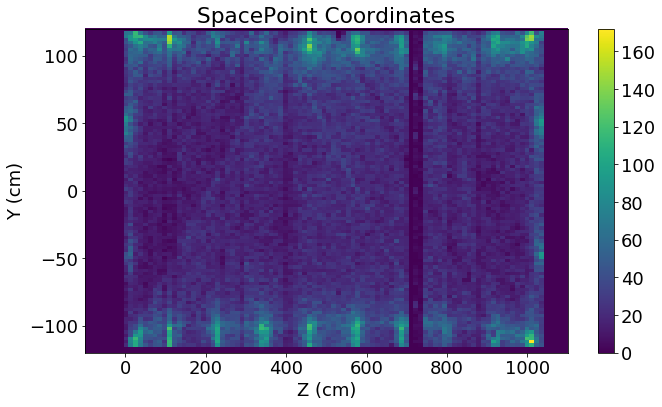

In [41]:
fig = plt.figure(figsize=(10,6))
plt.hist2d(df_Sps_beam_off['sps_z'].values,df_Sps_beam_off['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SpacePoint Coordinates")
plt.xlabel('Z (cm)')
plt.ylabel('Y (cm)')

plt.tight_layout()
plt.show()
fig.savefig('SpacePoint_Off_Beam_YZ', dpi=300)

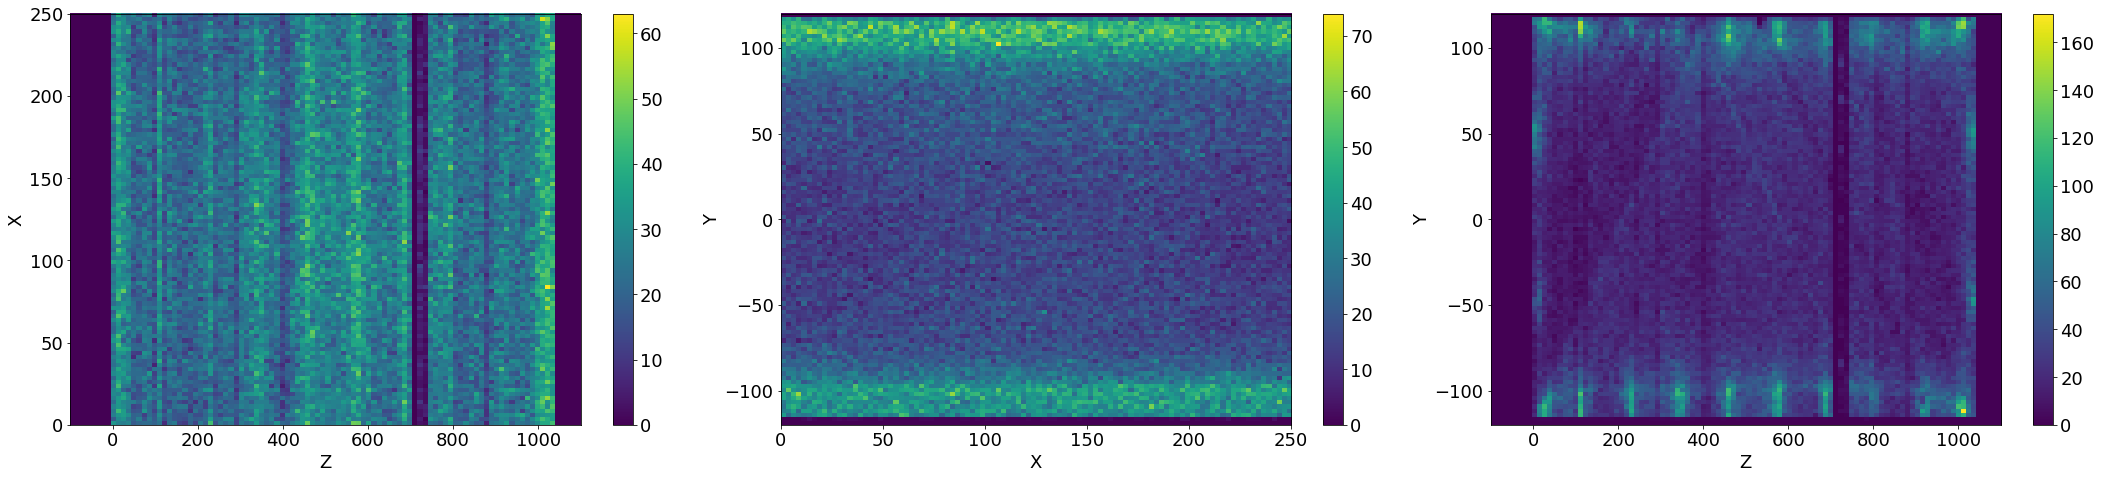

In [42]:
fig = plt.figure(figsize=(30,7))
plt.subplot(1, 3, 1)
plt.hist2d(df_Sps_beam_off['sps_z'].values,df_Sps_beam_off['sps_x'].values,bins=(100,100), range=[[-100,1100], [0,250]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
# plt.title("SpacePoint Coordinates")
plt.xlabel('Z')
plt.ylabel('X')

plt.subplot(1, 3, 2)
plt.hist2d(df_Sps_beam_off['sps_x'].values,df_Sps_beam_off['sps_y'].values,bins=(100,100), range=[[0,250], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
# plt.title("SpacePoint Coordinates")
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(1, 3, 3)
plt.hist2d(df_Sps_beam_off['sps_z'].values,df_Sps_beam_off['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
# plt.title("SpacePoint Coordinates")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()

plt.show()
fig.savefig('SpacePoint_Off_Beam', dpi=300)


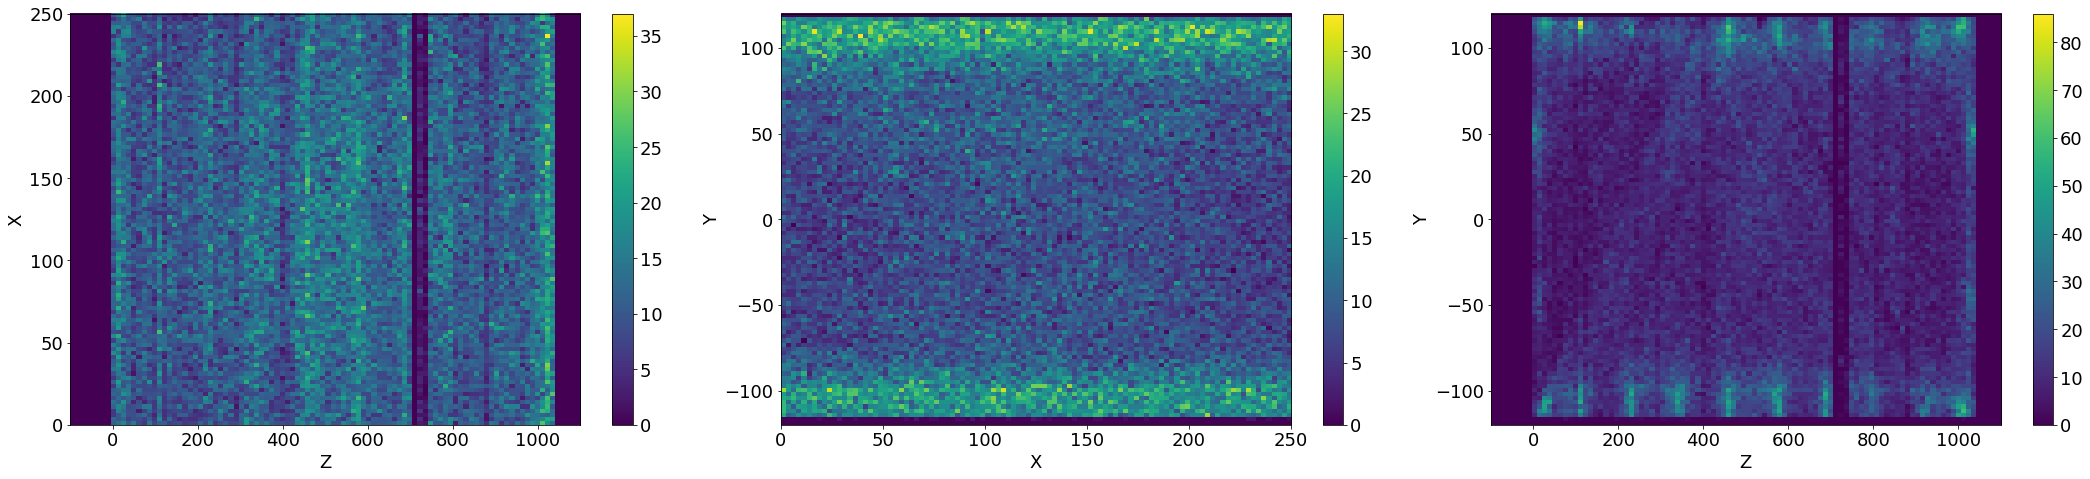

In [43]:
fig = plt.figure(figsize=(30,7))
plt.subplot(1, 3, 1)
plt.hist2d(df_Sps_beam_on['sps_z'].values,df_Sps_beam_on['sps_x'].values,bins=(100,100), range=[[-100,1100], [0,250]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
# plt.title("SpacePoint Coordinates")
plt.xlabel('Z')
plt.ylabel('X')

plt.subplot(1, 3, 2)
plt.hist2d(df_Sps_beam_on['sps_x'].values,df_Sps_beam_on['sps_y'].values,bins=(100,100), range=[[0,250], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
# plt.title("SpacePoint Coordinates")
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(1, 3, 3)
plt.hist2d(df_Sps_beam_on['sps_z'].values,df_Sps_beam_on['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
# plt.title("SpacePoint Coordinates")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()

plt.show()
fig.savefig('SpacePoint_ON_Beam', dpi=300)


In [44]:
df_G10_OFF=df_Sps_beam_off.query('sps_y < -90.0 or sps_y > 90.0')

print df_G10_OFF.shape[0]
print df_Event_beam_off.shape[0]
print (df_G10_OFF.shape[0]/df_Event_beam_off.shape[0])

89379
6719
13


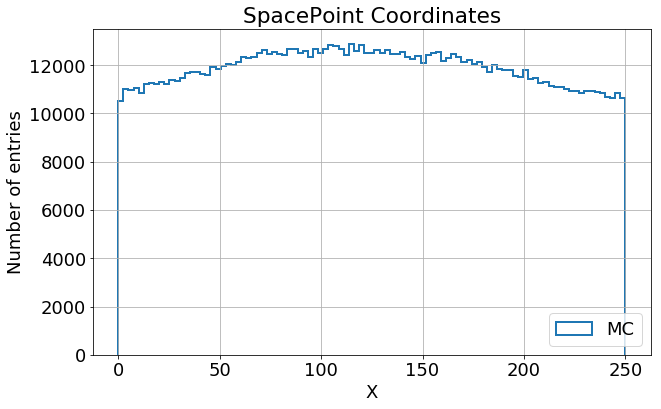

In [45]:
BINS = np.linspace(0,250,100)

fig = plt.figure(figsize=(10,6))
plt.hist(df_Sps_MC['sps_x'].values,bins=BINS,histtype='step',lw=2,label='MC')

plt.title("SpacePoint Coordinates")
plt.xlabel('X')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=4)
plt.show()

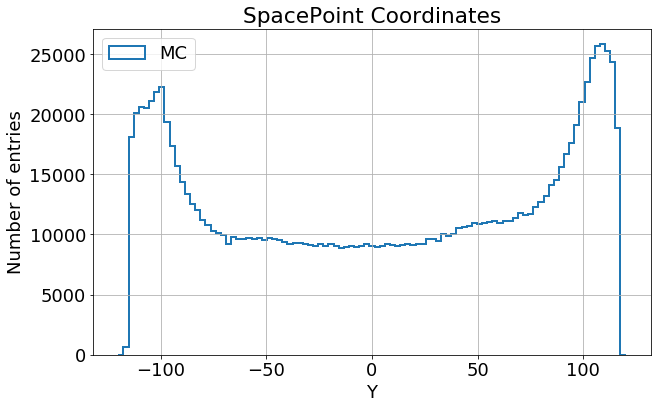

In [46]:
BINS = np.linspace(-120,120,100)

fig = plt.figure(figsize=(10,6))
plt.hist(df_Sps_MC['sps_y'].values,bins=BINS,histtype='step',lw=2,label='MC')

plt.title("SpacePoint Coordinates")
plt.xlabel('Y')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=2)
plt.show()

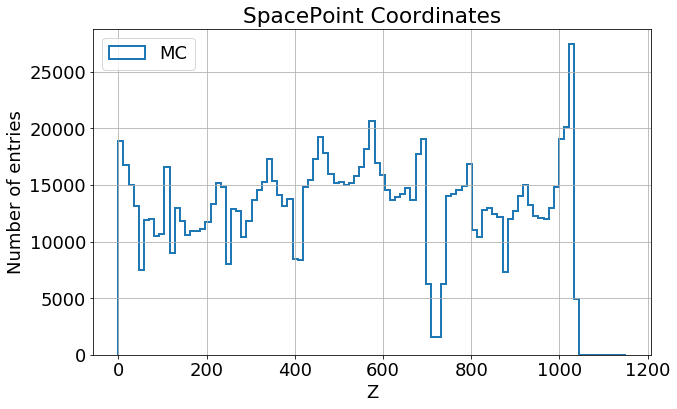

In [47]:
BINS = np.linspace(0,1150,100)

fig = plt.figure(figsize=(10,6))
plt.hist(df_Sps_MC['sps_z'].values,bins=BINS,histtype='step',lw=2,label='MC')

plt.title("SpacePoint Coordinates")
plt.xlabel('Z')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=2)
plt.show()

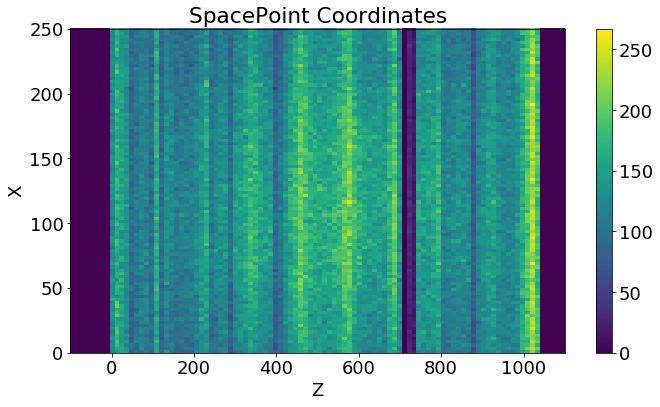

In [48]:
fig = plt.figure(figsize=(10,6))
plt.hist2d(df_Sps_MC['sps_z'].values,df_Sps_MC['sps_x'].values,bins=(100,100), range=[[-100,1100], [0,250]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SpacePoint Coordinates")
plt.xlabel('Z')
plt.ylabel('X')

plt.tight_layout()
plt.show()

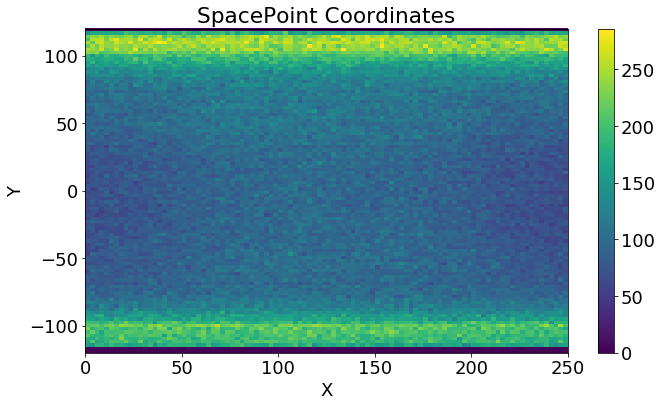

In [49]:
fig = plt.figure(figsize=(10,6))
plt.hist2d(df_Sps_MC['sps_x'].values,df_Sps_MC['sps_y'].values,bins=(100,100), range=[[0,250], [-120,120]] ,label='OFF Beam Data')#,vmin=0, vmax=250)#,norm=LogNorm())
plt.colorbar()
plt.title("SpacePoint Coordinates")
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

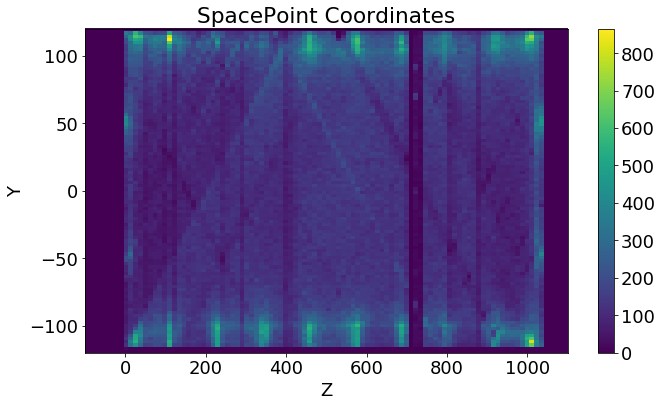

In [50]:
fig = plt.figure(figsize=(10,6))
plt.hist2d(df_Sps_MC['sps_z'].values,df_Sps_MC['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SpacePoint Coordinates")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

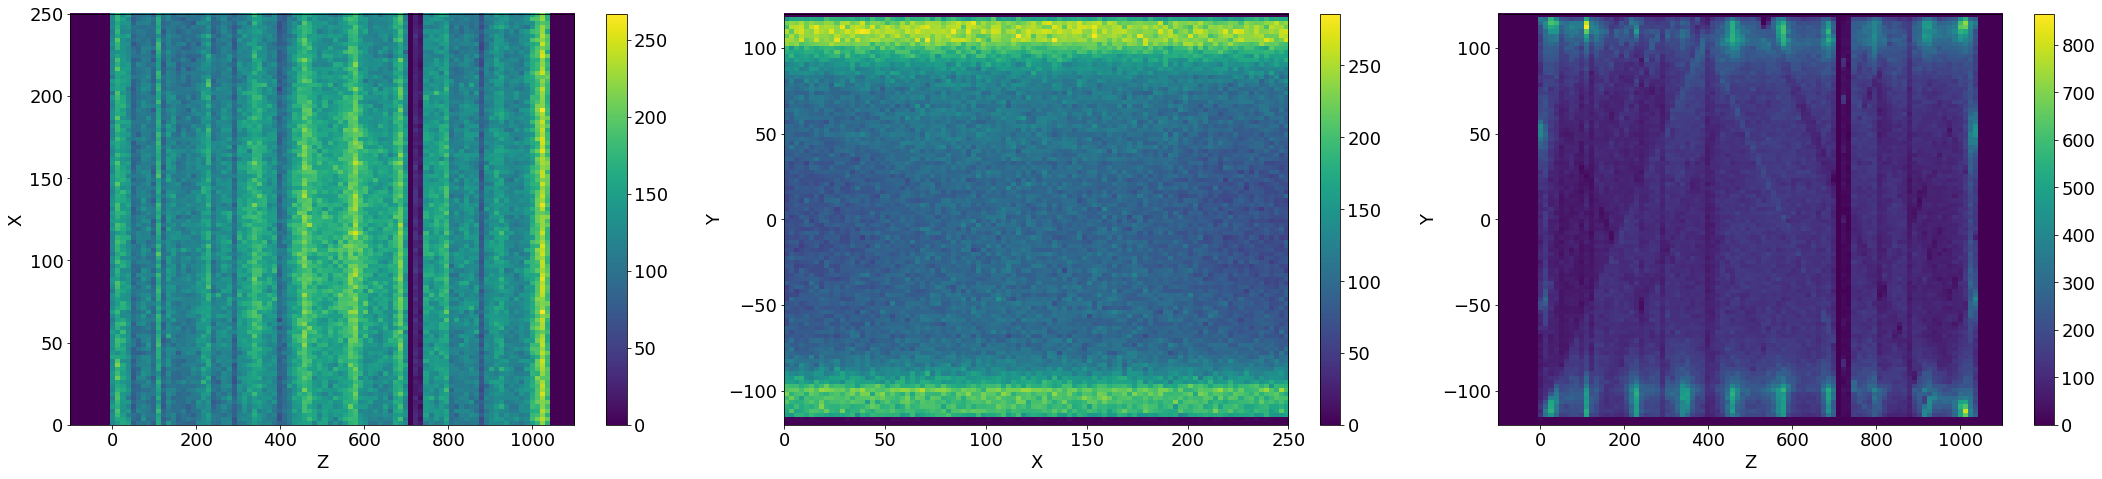

In [51]:
fig = plt.figure(figsize=(30,7))
plt.subplot(1, 3, 1)
plt.hist2d(df_Sps_MC['sps_z'].values,df_Sps_MC['sps_x'].values,bins=(100,100), range=[[-100,1100], [0,250]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
# plt.title("SpacePoint Coordinates")
plt.xlabel('Z')
plt.ylabel('X')

plt.subplot(1, 3, 2)
plt.hist2d(df_Sps_MC['sps_x'].values,df_Sps_MC['sps_y'].values,bins=(100,100), range=[[0,250], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
# plt.title("SpacePoint Coordinates")
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(1, 3, 3)
plt.hist2d(df_Sps_MC['sps_z'].values,df_Sps_MC['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
# plt.title("SpacePoint Coordinates")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()

plt.show()
fig.savefig('SpacePoint_MC_overlays', dpi=300)


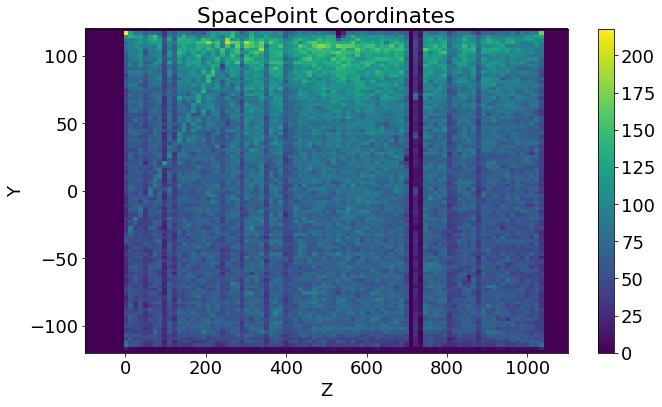

In [52]:
fig = plt.figure(figsize=(10,6))
plt.hist2d(df_Sps_NO_overlay['sps_z'].values,df_Sps_NO_overlay['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='No Overlay')#,norm=LogNorm())
plt.colorbar()
plt.title("SpacePoint Coordinates")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

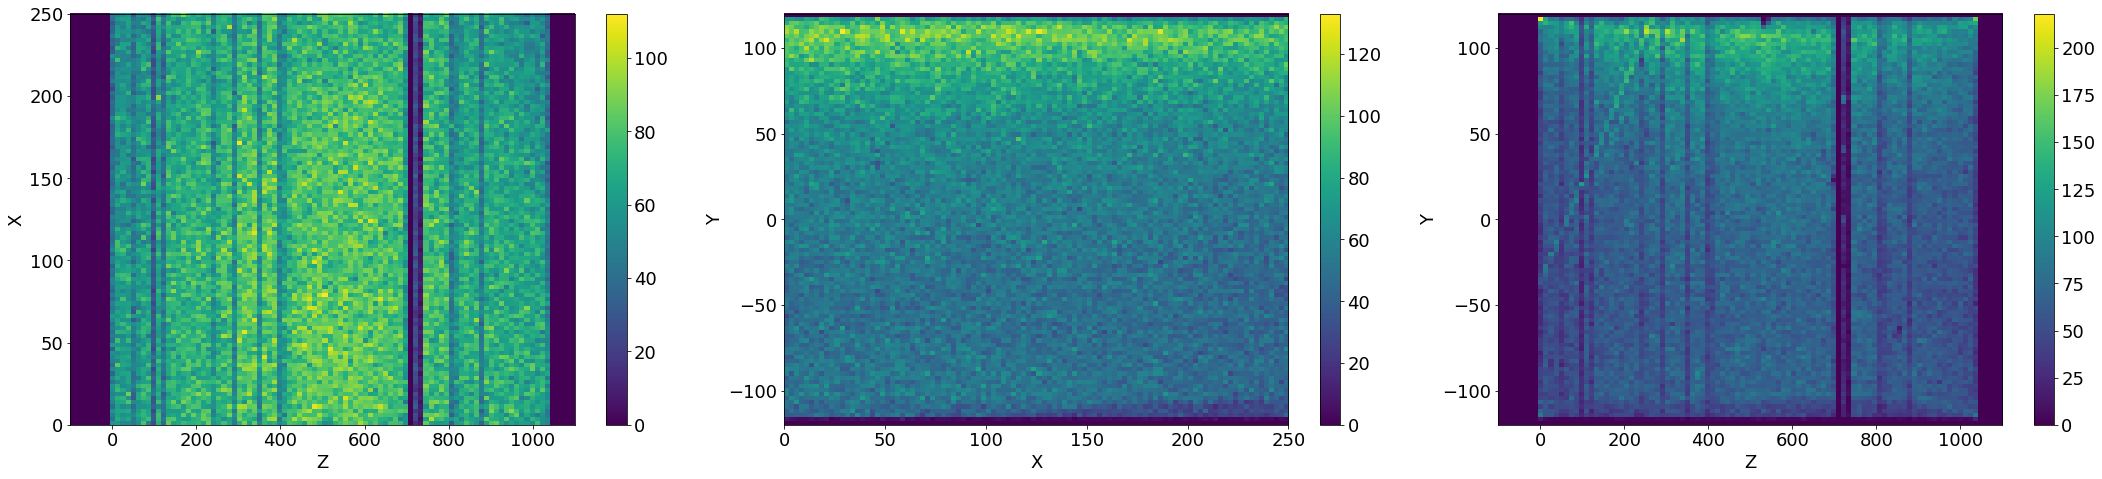

In [53]:
fig = plt.figure(figsize=(30,7))
plt.subplot(1, 3, 1)
plt.hist2d(df_Sps_NO_overlay['sps_z'].values,df_Sps_NO_overlay['sps_x'].values,bins=(100,100), range=[[-100,1100], [0,250]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
# plt.title("SpacePoint Coordinates")
plt.xlabel('Z')
plt.ylabel('X')

plt.subplot(1, 3, 2)
plt.hist2d(df_Sps_NO_overlay['sps_x'].values,df_Sps_NO_overlay['sps_y'].values,bins=(100,100), range=[[0,250], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
# plt.title("SpacePoint Coordinates")
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(1, 3, 3)
plt.hist2d(df_Sps_NO_overlay['sps_z'].values,df_Sps_NO_overlay['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
# plt.title("SpacePoint Coordinates")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()

plt.show()
fig.savefig('SpacePoint_NO_overlay_overlay', dpi=300)


<Figure size 864x576 with 0 Axes>

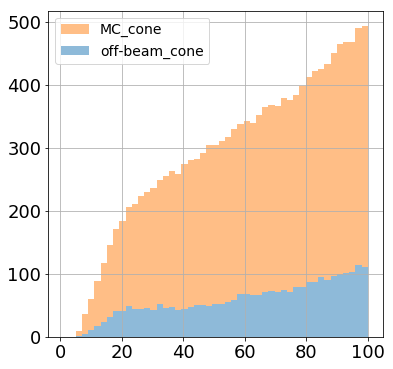

In [54]:
BINS = np.linspace(1,100,50)

POWER = 2


dfOFF_r_v = df_Sps_beam_off_cone['distance'].values

weightsOFF_rweighted = weightsOFF_Sps_cone
#for i in xrange(len(weightsOFF_Sps_cone)):
#    weightsOFF_rweighted[i] /= (4*np.pi*(dfOFF_r_v[i]**POWER))


dfMC_r_v = df_Sps_MC_cone['distance'].values

weightsMC_rweighted = weightsMC_Sps_cone
#for i in xrange(len(weightsMC_Sps_cone)):
#    weightsMC_rweighted[i] /= (4*np.pi*(dfMC_r_v[i]**POWER))

WEIGHTS_Sps = [weightsOFF_rweighted,weightsMC_rweighted]
fig = plt.figure(figsize=(12,8))

bins=BINS
xstacked = [df_Sps_beam_off_cone['distance'].values,df_Sps_MC_cone['distance'].values]
LABELS = ['off-beam_cone','MC_cone']

fig = plt.figure(figsize=(6,6))
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Sps,stacked=True,alpha=0.5)
vals,bine = np.histogram(df_Sps_beam_on_cone['distance'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
vals_rweighted = vals
errs_rweighted = errs
for i,r in enumerate(binc):
    vals_rweighted[i] /= (4*np.pi*(r**POWER))
    errs_rweighted[i] /= (4*np.pi*(r**POWER))
#plt.errorbar(binc,vals_rweighted,yerr=errs_rweighted,fmt='o',color='k',markersize=5,label='on-beam_cone')
plt.grid()
plt.legend(loc=2,fontsize=14)
#plt.yscale('log')
#vol_frac_stacked    
#plt.hist(vol_frac_stacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS,stacked=True,alpha=0.5)
plt.show()

<function matplotlib.pyplot.show>

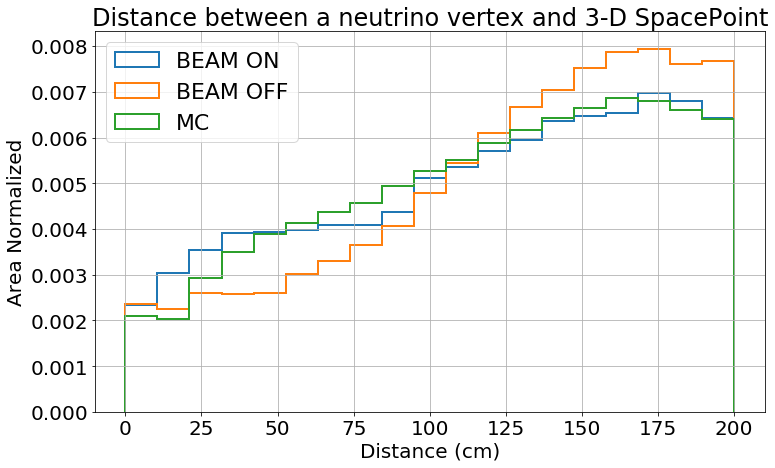

In [55]:
BINS = np.linspace(0,200,20)

fig = plt.figure(figsize=(12,7))


plt.rcParams.update({'font.size': 20})
plt.hist(df_Sps_beam_on['distance'].values,bins=BINS,histtype='step',lw=2,label='BEAM ON',density=True)
plt.hist(df_Sps_beam_off['distance'].values,bins=BINS,histtype='step',lw=2,label='BEAM OFF',density=True)
plt.hist(df_Sps_MC['distance'].values,bins=BINS,histtype='step',lw=2,label='MC',density=True)
plt.grid()
plt.xlabel('Distance (cm)')
plt.ylabel('Area Normalized')
plt.title("Distance between a neutrino vertex and 3-D SpacePoint")
plt.legend(loc=2,fontsize=22)
plt.show
#plt.draw()
#fig.savefig('distance_mc_on_off', dpi=500)

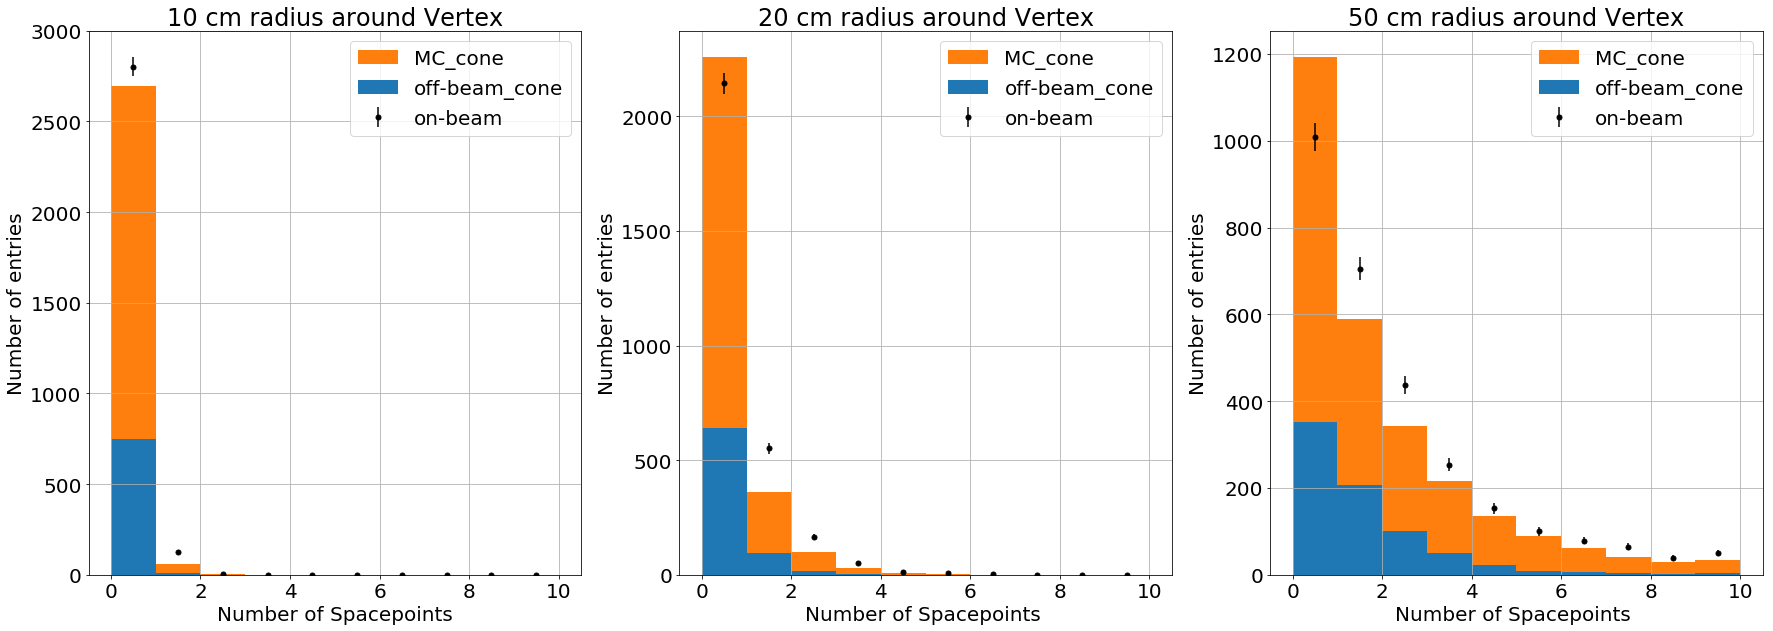

In [56]:

fig = plt.figure(figsize=(30,10))

plt.subplot(1, 3, 1)
BINS = np.linspace(0,10,11)
xstacked = [df_Event_beam_off_cone['N_sps10'].values,df_Event_MC_cone['N_sps10'].values]

WEIGHTS_Event_cone = [weightsOFF_Event_cone,weightsMC_Event_cone]
LABELS = ['off-beam_cone','MC_cone']

plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event_cone,stacked=True)

vals,bine = np.histogram(df_Event_beam_on_cone['N_sps10'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='on-beam')
plt.title("10 cm radius around Vertex")
plt.xlabel('Number of Spacepoints')
plt.ylabel('Number of entries')
plt.legend(loc=1)
#plt.yscale('log')
plt.grid()

plt.subplot(1, 3, 2)
BINS = np.linspace(0,10,11)
xstacked = [df_Event_beam_off_cone['N_sps20'].values,df_Event_MC_cone['N_sps20'].values]


LABELS = ['off-beam_cone','MC_cone']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event_cone,stacked=True)
vals,bine = np.histogram(df_Event_beam_on_cone['N_sps20'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='on-beam')
plt.title("20 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
#plt.yscale('log')
plt.grid()


plt.subplot(1, 3, 3)
BINS = np.linspace(0,10,11)
xstacked = [df_Event_beam_off_cone['N_sps50'].values,df_Event_MC_cone['N_sps50'].values]


LABELS = ['off-beam_cone','MC_cone']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event_cone,stacked=True)
vals,bine = np.histogram(df_Event_beam_on_cone['N_sps50'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='on-beam')
plt.title("50 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
#plt.yscale('log')
plt.grid()


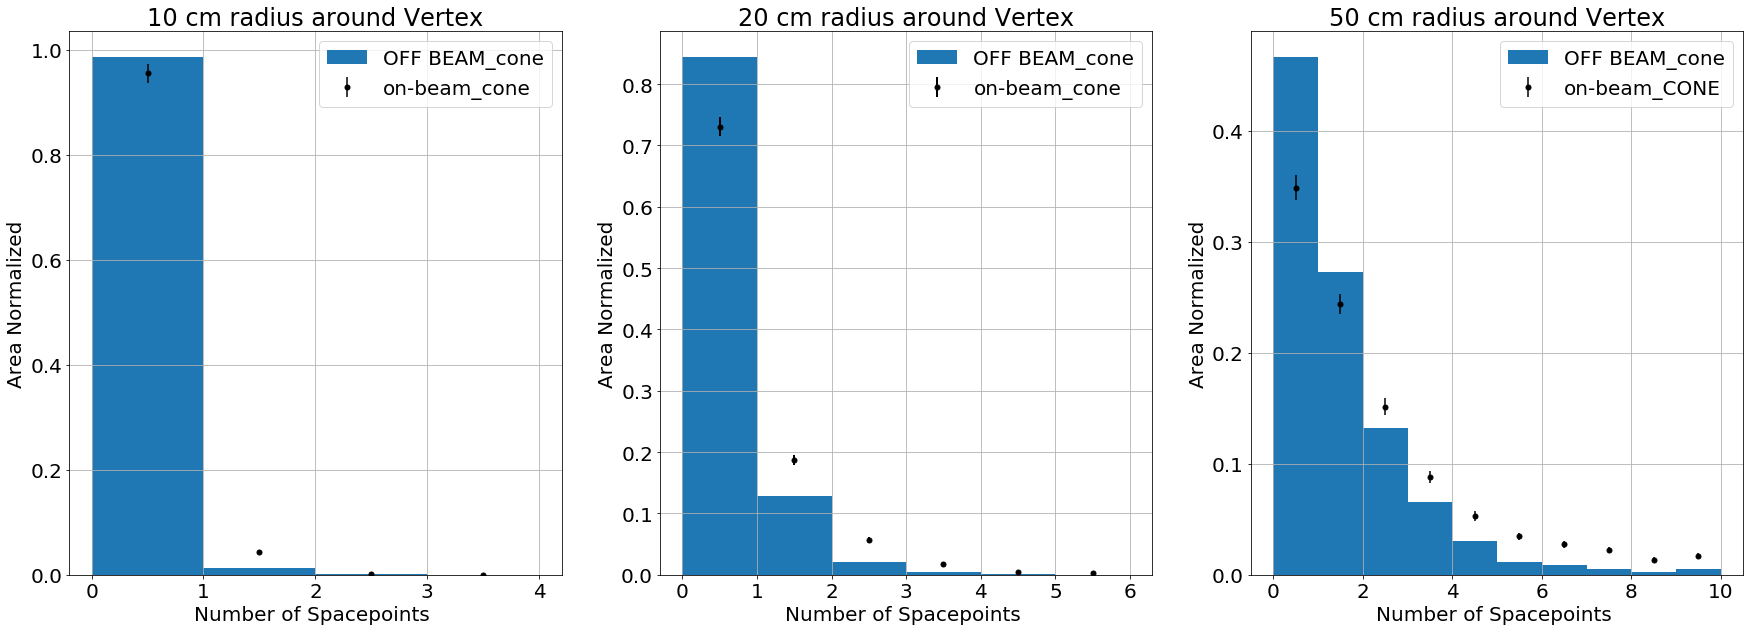

In [57]:

fig = plt.figure(figsize=(30,10))

plt.subplot(1, 3, 1)
BINS = np.linspace(0,4,5)

plt.hist(df_Event_beam_off_cone['N_sps10'].values,bins=BINS,histtype='stepfilled',label='OFF BEAM_cone',lw=2,density=True)
vals,bine = np.histogram(df_Event_beam_on_cone['N_sps10'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
binc = 0.5*(bine[1:]+bine[:-1])
binw = (bine[1]-bine[0])
vals = vals.astype(float)
errs = np.sqrt(vals)
vals_rweighted = vals
errs_rweighted = errs
vals_reweighted = vals_rweighted/(binw*(np.sum(vals)))
errs_reweighted = errs_rweighted/(binw*(np.sum(vals)))

plt.errorbar(binc,vals_reweighted,yerr=errs_reweighted,fmt='o',color='k',markersize=5,label='on-beam_cone')

plt.title("10 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Area Normalized')
plt.legend(loc=1)
plt.grid()


plt.subplot(1, 3, 2)
BINS = np.linspace(0,6,7)
plt.hist(df_Event_beam_off_cone['N_sps20'].values,bins=BINS,histtype='stepfilled',label='OFF BEAM_cone',density=True,lw=2)
vals,bine = np.histogram(df_Event_beam_on_cone['N_sps20'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
binw = (bine[1]-bine[0])
vals = vals.astype(float)
errs = np.sqrt(vals)
vals_rweighted = vals
errs_rweighted = errs
vals_reweighted = vals_rweighted/(binw*(np.sum(vals)))
errs_reweighted = errs_rweighted/(binw*(np.sum(vals)))

plt.errorbar(binc,vals_reweighted,yerr=errs_reweighted,fmt='o',color='k',markersize=5,label='on-beam_cone',lw=2)

plt.title("20 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Area Normalized')
plt.legend(loc=1)
plt.grid()
plt.subplot(1, 3, 3)
BINS = np.linspace(0,10,11)
plt.hist(df_Event_beam_off_cone['N_sps50'].values,bins=BINS,histtype='stepfilled',label='OFF BEAM_cone',lw=2,density=True)
vals,bine = np.histogram(df_Event_beam_on_cone['N_sps50'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
binw = (bine[1]-bine[0])
vals = vals.astype(float)
errs = np.sqrt(vals)
vals_rweighted = vals
errs_rweighted = errs
vals_reweighted = vals_rweighted/(binw*(np.sum(vals)))
errs_reweighted = errs_rweighted/(binw*(np.sum(vals)))

plt.errorbar(binc,vals_reweighted,yerr=errs_reweighted,fmt='o',color='k',markersize=5,label='on-beam_CONE')

plt.title("50 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Area Normalized')
plt.legend(loc=1)
plt.grid()
plt.show()


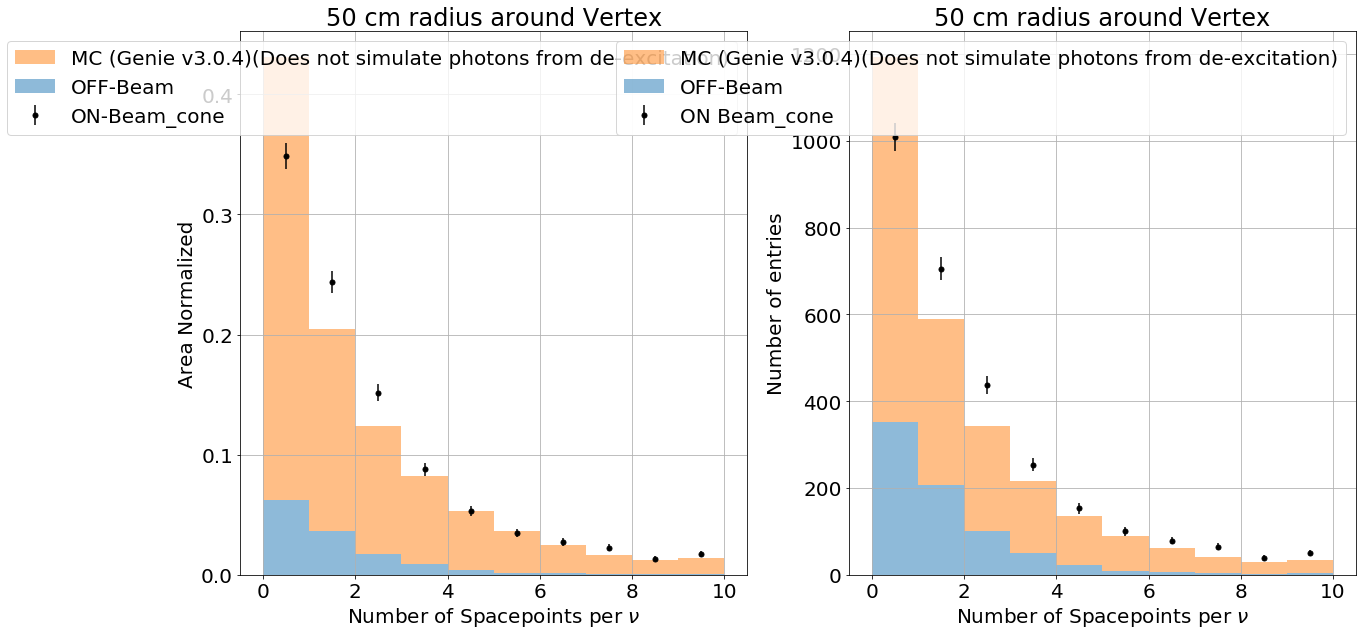

In [58]:
fig = plt.figure(figsize=(20,10))
BINS = np.linspace(0,10,11)
plt.subplot(1, 2, 1)
LABELS = ['OFF-Beam','MC (Genie v3.0.4)(Does not simulate photons from de-excitation)']
xstacked = [df_Event_beam_off_cone['N_sps50'].values,df_Event_MC_cone['N_sps50'].values]
plt.hist(xstacked,bins=BINS,histtype='stepfilled',stacked=True,label=LABELS,alpha=0.5,density=True)
vals,bine = np.histogram(df_Event_beam_on_cone['N_sps50'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
binw = (bine[1]-bine[0])
vals = vals.astype(float)
errs = np.sqrt(vals)
vals_rweighted = vals
errs_rweighted = errs
vals_reweighted = vals_rweighted/(binw*(np.sum(vals)))
errs_reweighted = errs_rweighted/(binw*(np.sum(vals)))

plt.errorbar(binc,vals_reweighted,yerr=errs_reweighted,fmt='o',color='k',markersize=5,label='ON-Beam_cone')

plt.title("50 cm radius around Vertex")
plt.xlabel('Number of Spacepoints per $\\nu$')
plt.ylabel('Area Normalized')
plt.legend(loc=1)
plt.grid()

plt.subplot(1, 2, 2)
BINS = np.linspace(0,10,11)
xstacked = [df_Event_beam_off_cone['N_sps50'].values,df_Event_MC_cone['N_sps50'].values]
plt.hist(xstacked,bins=BINS,histtype='stepfilled',weights=WEIGHTS_Event_cone,stacked=True,label=LABELS,alpha=0.5)
vals,bine = np.histogram(df_Event_beam_on_cone['N_sps50'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam_cone')
plt.title("50 cm radius around Vertex")
plt.xlabel('Number of Spacepoints per $\\nu$')
plt.ylabel('Number of entries')
plt.legend(loc=1)
plt.grid()
plt.draw()
fig.savefig('distance_50cm', dpi=400)

In [59]:
print(df_Event_beam_off_cone['N_sps50'].mean())
print(df_Event_MC_cone['N_sps50'].mean())
print(df_Event_beam_on_cone['N_sps50'].mean())
#off_scaling_cone=0.15456674775
#MC_scaling_cone=0.0533812261

1.1080309824704444
1.8102944831013916
1.9478527607361964


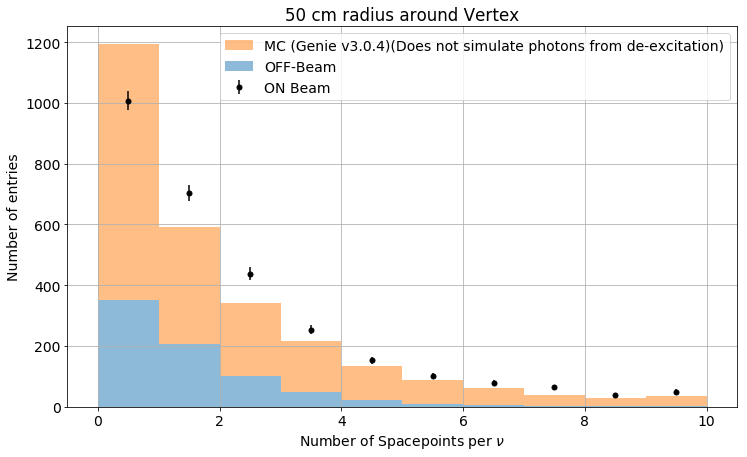

In [60]:
fig = plt.figure(figsize=(12,7))
BINS = np.linspace(0,10,11)
plt.rcParams.update({'font.size': 14})
xstacked = [df_Event_beam_off_cone['N_sps50'].values,df_Event_MC_cone['N_sps50'].values]
plt.hist(xstacked,bins=BINS,histtype='stepfilled',weights=WEIGHTS_Event_cone,stacked=True,label=LABELS,alpha=0.5)
vals,bine = np.histogram(df_Event_beam_on_cone['N_sps50'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("50 cm radius around Vertex")
plt.xlabel('Number of Spacepoints per $\\nu$')
plt.ylabel('Number of entries')
plt.legend(loc=1)
plt.grid()
plt.draw()
fig.savefig('distance_50cm', dpi=400)



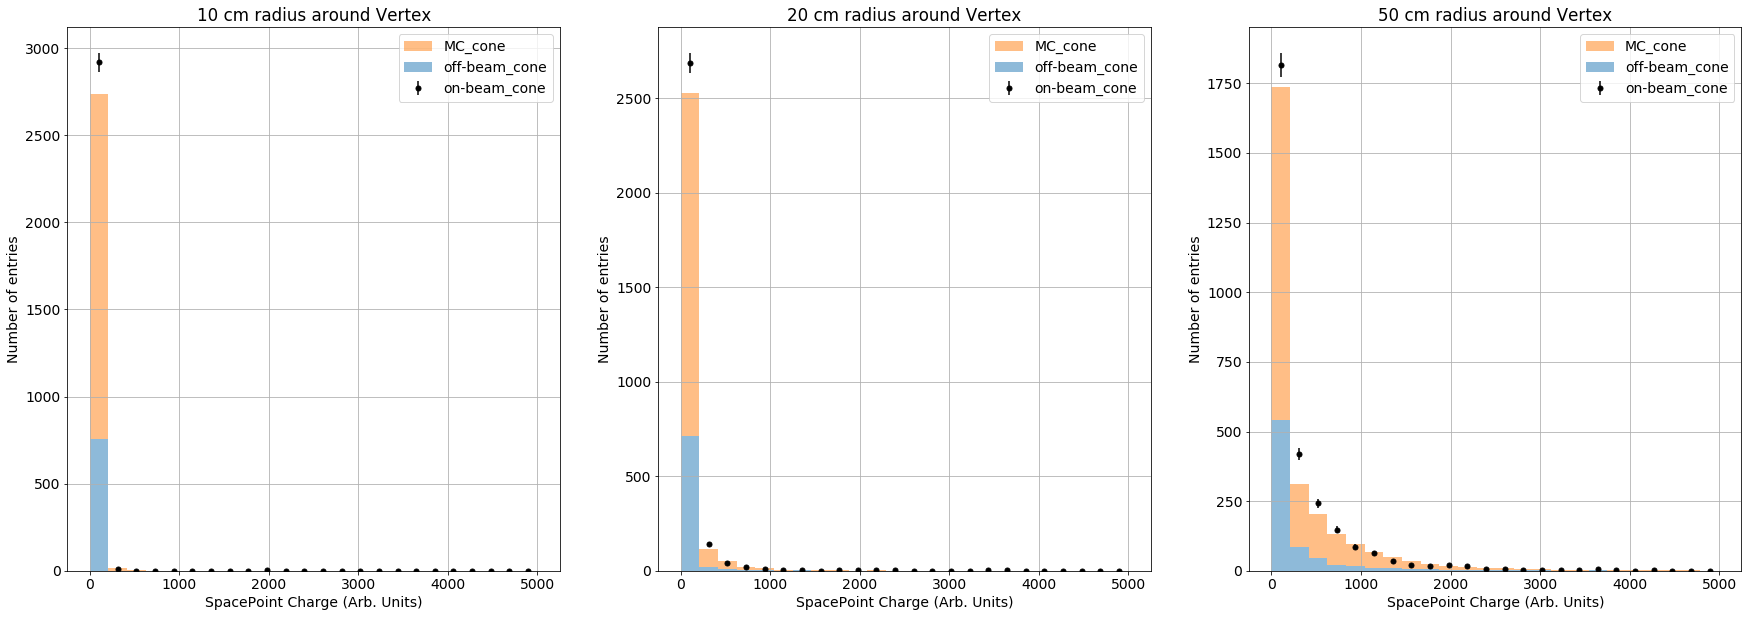

In [61]:

fig = plt.figure(figsize=(30,10))

plt.subplot(1, 3, 1)
BINS = np.linspace(0,5000,25)

xstacked = [df_Event_beam_off_cone['sps_cluster_charge10'].values,df_Event_MC_cone['sps_cluster_charge10'].values]
LABELS = ['off-beam_cone','MC_cone']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event_cone,stacked=True,alpha=0.5)
vals,bine = np.histogram(df_Event_beam_on_cone['sps_cluster_charge10'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
#plt.yscale('log')
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='on-beam_cone')
plt.title("10 cm radius around Vertex")
plt.xlabel('SpacePoint Charge (Arb. Units)')
plt.ylabel('Number of entries')
plt.legend(loc=1)
plt.grid()


plt.subplot(1, 3, 2)
BINS = np.linspace(0,5000,25)
xstacked = [df_Event_beam_off_cone['sps_cluster_charge20'].values,df_Event_MC_cone['sps_cluster_charge20'].values]
LABELS = ['off-beam_cone','MC_cone']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event_cone,stacked=True,alpha=0.5)
vals,bine = np.histogram(df_Event_beam_on_cone['sps_cluster_charge20'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
#plt.yscale('log')
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='on-beam_cone')
plt.title("20 cm radius around Vertex")
plt.xlabel('SpacePoint Charge (Arb. Units)')
plt.ylabel('Number of entries')
plt.legend(loc=1)
plt.grid()

plt.subplot(1, 3, 3)
BINS = np.linspace(0,5000,25)
xstacked = [df_Event_beam_off_cone['sps_cluster_charge50'].values,df_Event_MC_cone['sps_cluster_charge50'].values]
LABELS = ['off-beam_cone','MC_cone']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event_cone,stacked=True,alpha=0.5)
vals,bine = np.histogram(df_Event_beam_on_cone['sps_cluster_charge50'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
#plt.yscale('log')
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='on-beam_cone')
plt.title("50 cm radius around Vertex")
plt.xlabel('SpacePoint Charge (Arb. Units)')
plt.ylabel('Number of entries')
plt.legend(loc=1)
plt.grid()

plt.show()


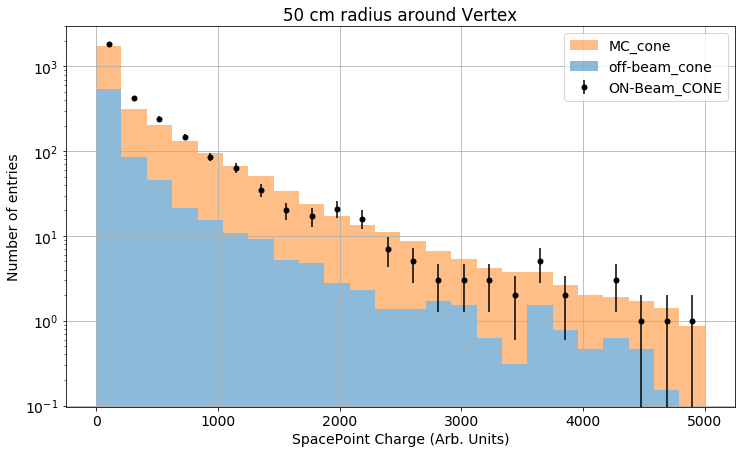

<Figure size 432x288 with 0 Axes>

In [62]:
fig = plt.figure(figsize=(12,7))
BINS = np.linspace(0,5000,25)
xstacked = [df_Event_beam_off_cone['sps_cluster_charge50'].values,df_Event_MC_cone['sps_cluster_charge50'].values]
LABELS = ['off-beam_cone','MC_cone']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event_cone,stacked=True,alpha=0.5)
vals,bine = np.histogram(df_Event_beam_on_cone['sps_cluster_charge50'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
plt.yscale('log')
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON-Beam_CONE')
plt.title("50 cm radius around Vertex")
plt.xlabel('SpacePoint Charge (Arb. Units)')
plt.ylabel('Number of entries')
plt.legend(loc=1)
plt.grid()

plt.show()
plt.draw()
fig.savefig('Charge_50cm', dpi=400)

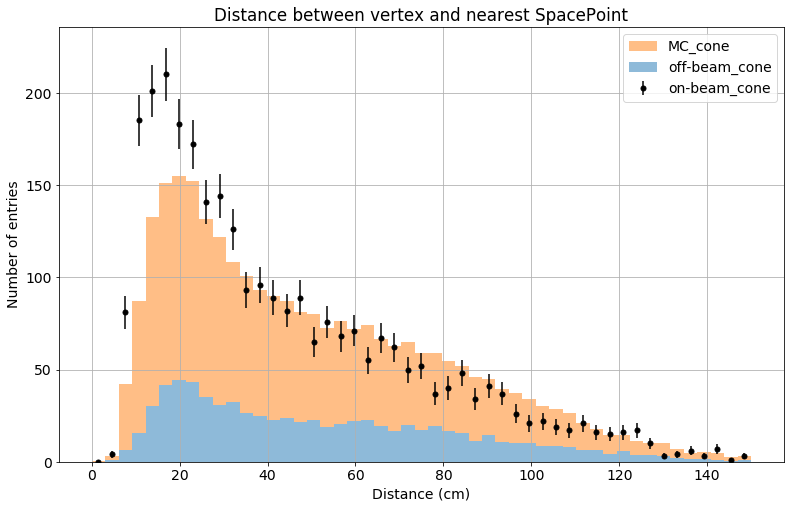

In [63]:


BINS = np.linspace(0,150,50)
fig = plt.figure(figsize=(13,8))
xstacked = [df_Event_beam_off_cone['distance_smallest'].values,df_Event_MC_cone['distance_smallest'].values]
LABELS = ['off-beam_cone','MC_cone']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event_cone,stacked=True,alpha=0.5)
vals,bine = np.histogram(df_Event_beam_on_cone['distance_smallest'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='on-beam_cone')
plt.title("Distance between vertex and nearest SpacePoint")
plt.xlabel('Distance (cm)')
plt.ylabel('Number of entries')
plt.legend(loc=1)
plt.grid()
#plt.yscale('log')
plt.show()

#plt.draw()
#fig.savefig('distance_smallest', dpi=400)

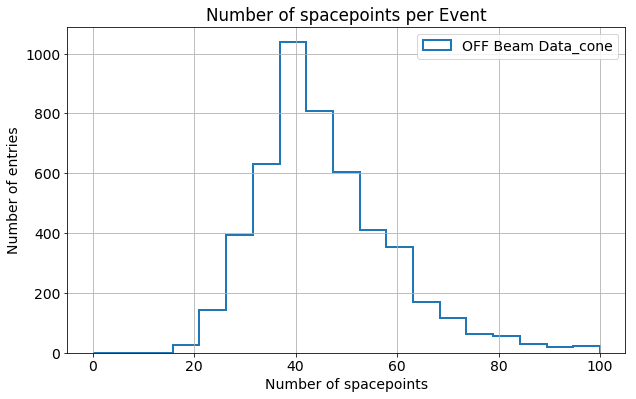

In [64]:
BINS = np.linspace(0,100,20)

fig = plt.figure(figsize=(10,6))
plt.hist(df_Event_beam_off_cone['N_sps'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data_cone')

plt.title("Number of spacepoints per Event")
plt.xlabel('Number of spacepoints')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1)
plt.show()



In [65]:
# Argon properties

#LAr temperature
T = 89
# density
rho = 1.38 # g/cm^3

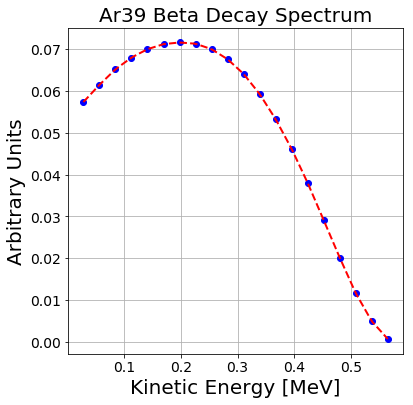

In [66]:
# Ar 39 energy spectrum

Ar39_E_v = [0.0282,0.0565,0.0847,0.1130,0.1412,0.1695,0.1977,0.2260,\
            0.2542,0.2825,0.3107,0.3390,0.3672,0.3955,0.4237,0.4520,0.4802,0.5085,0.5367,0.5650]

Ar39_A_v = [5.73E-02,6.14E-02,6.51E-02,6.79E-02,6.99E-02,7.11E-02,7.15E-02,\
            7.12E-02,6.99E-02,6.75E-02,6.40E-02,5.92E-02,5.32E-02,4.61E-02,\
            3.80E-02,2.91E-02,2.02E-02,1.17E-02,5.02E-03,7.77E-04]

# spline
Ar39spectrum = interp1d(Ar39_E_v,Ar39_A_v)

fig = plt.figure(figsize=(6,6))
plt.plot(Ar39_E_v,Ar39_A_v,'bo',lw=2)
xvals = np.linspace(Ar39_E_v[0],Ar39_E_v[-1],100)
plt.plot(xvals,Ar39spectrum(xvals),'r--',lw=2)
plt.xlabel("Kinetic Energy [MeV]",fontsize=20)
plt.ylabel('Arbitrary Units',fontsize=20)
plt.title('Ar39 Beta Decay Spectrum',fontsize=20)
plt.grid()
plt.show()

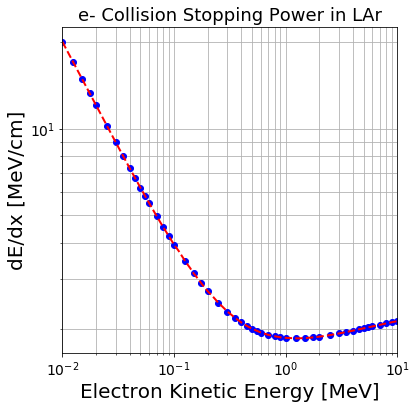

In [67]:
# load electron energy loss info [NIST]
fin = open('/uboone/app/users/abhat/gammacatcher_v08_00_00_09/srcs/ubreco/ubreco/GammaCatcher/nist_esar_ar_1p38density_188eV.txt','r')
ctr = 0

energy_v = []
collision_v = []

for line in fin:
    ctr += 1
    
    if (ctr < 9):
        continue
    words = line.split()
    if (len(words) != 4):
        continue
    energy_v.append   ( float(words[0])       )
    collision_v.append( float(words[1]) * rho )
    
energy_v    = np.array(energy_v   )
collision_v = np.array(collision_v)

dEdx = interp1d(energy_v,collision_v)

fig = plt.figure(figsize=(6,6))
plt.plot(energy_v,collision_v,'bo',lw=2)
xvals = np.linspace(0.01,10,1000)
plt.plot(xvals,dEdx(xvals),'r--',lw=2)
plt.xlim([0.01,10])
plt.xscale('log')
plt.yscale('log')
plt.grid(which='both')
plt.xlabel('Electron Kinetic Energy [MeV]',fontsize=20)
plt.ylabel('dE/dx [MeV/cm]',fontsize=20)
plt.title('e- Collision Stopping Power in LAr',fontsize=18)
plt.show()

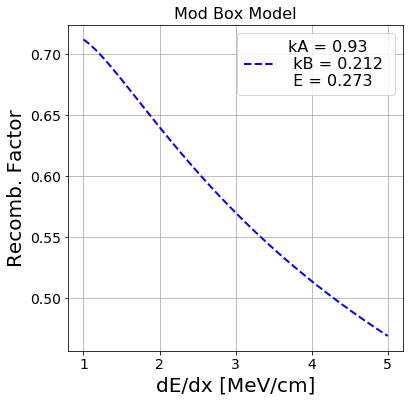

In [68]:
# Ion recombination model

# recombination model
def RecombModBox(dEdx, A, B, Efield):
    B /= (rho * Efield)
    r = np.log( dEdx * B + A ) / ( dEdx * B )
    return 1-r

def RecombBirks(dEdx, A, k, Efield):
    k /= rho
    r = ( 1 + k * dEdx / Efield ) / A
    return 1/r


fRecombA  = 0.8 # +- 0.003
fRecombk  = 0.0486 # +- 0.0006

fModBoxA = 0.93
fModBoxB = 0.212#0.212#3

fEfield  = 0.273

fig = plt.figure(figsize=(6,6))
dedx_v = np.linspace(1,5,100)
R_v = []
for dedx in dedx_v:
    R_v.append(1-RecombModBox(dedx,fModBoxA,fModBoxB,fEfield))
plt.plot(dedx_v,R_v,'b--',lw=2,label='kA = 0.93 \n kB = 0.212 \n E = 0.273')
plt.grid()
plt.xlabel('dE/dx [MeV/cm]',fontsize=20)
plt.ylabel('Recomb. Factor',fontsize=20)
plt.title('Mod Box Model',fontsize=16)
plt.legend(loc=1,fontsize=16)
plt.show()

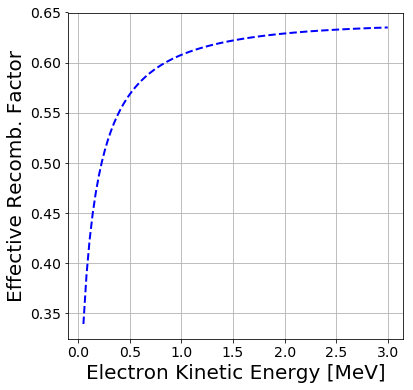

In [69]:
# Apply recombination model to get effective recombination for each electron energy
# return effective charge quenching amount
# effective recombination = amount of recombination for total energy lost by electron of given KE.

def EffectiveRecomb(ElectronEnergy,Estep,Field):
    
    # keep track of total energy lost
    dEtot = 0.
    # and total energy "seen" after recomb.
    dEobs = 0.
    
    while (ElectronEnergy > 1e-2):
    
        dedx = dEdx(ElectronEnergy)
        R    = RecombModBox(dedx,fModBoxA,fModBoxB,Field)
        
        dEtot += Estep
        dEobs += Estep * (1-R)
        
        ElectronEnergy -= Estep
        
        #print '@ E = %.02f : dE/dx : %.02f Etot : %.02f Eobs : %.02f'%(ElectronEnergy,dedx,dEtot,dEobs)
        
    # perform last step
    dedx = dEdx(1e-2)
    dEtot += ElectronEnergy
    dEobs += ElectronEnergy * (1 - RecombModBox(dedx,fModBoxA,fModBoxB,Field))
    #print '@ E = %.02f : dE/dx : %.02f Etot : %.02f Eobs : %.02f'%(ElectronEnergy,dedx,dEtot,dEobs)
    
    return dEobs/dEtot

def Charge(ElectronEnergy,efield):
    
    EffRecomb = EffectiveRecomb(ElectronEnergy,0.01,efield)
    Eobs = ElectronEnergy * EffRecomb
    Qobs = Eobs / (23.6 * (1e-6))
    return Qobs

EffectiveRecomb_v = np.vectorize(EffectiveRecomb)
Charge_v = np.vectorize(Charge)

EffectiveRecomb(0.25,0.01,0.273)

fig = plt.figure(figsize=(6,6))
Evals = np.linspace(0.05,3,100)
Rvals = []
for E in Evals:
    Rvals.append(EffectiveRecomb(E,0.01,0.273))
plt.plot(Evals,Rvals,'b--',lw=2)
plt.xlabel('Electron Kinetic Energy [MeV]',fontsize=20)
plt.ylabel('Effective Recomb. Factor',fontsize=20)
plt.grid()
plt.show()



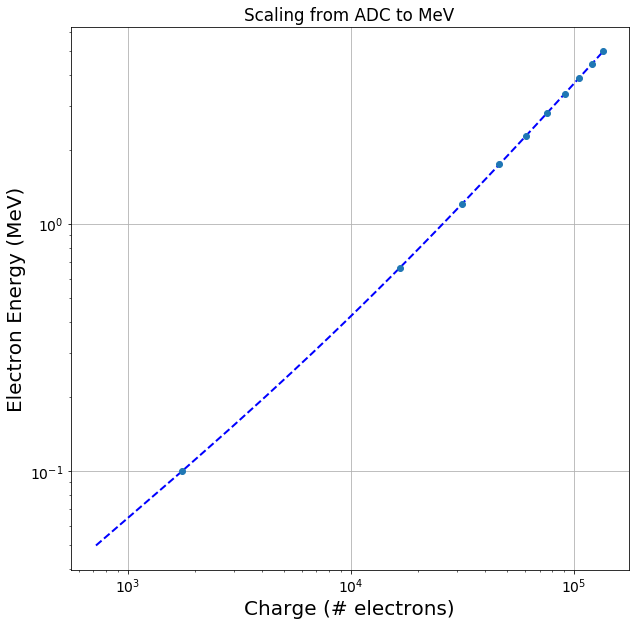

In [70]:
fig = plt.figure(figsize=(10,10))
Evals = np.linspace(0.05,5,100)
Qvals = []
for E in Evals:
    #R = EffectiveRecomb(E,0.01,0.273)
    Q = Charge(E,0.273)
    Qvals.append(Q)
    
fQ2E = interp1d(Qvals, Evals,kind='cubic')
xnew = np.linspace(Qvals[1], Qvals[-1], num=10, endpoint=True)
plt.plot(Qvals,Evals,'b--',xnew, fQ2E(xnew),'o',lw=2)
print fQ2E
plt.ylabel('Electron Energy (MeV)',fontsize=20)
plt.xlabel('Charge (# electrons)',fontsize=20)
plt.grid()
plt.yscale('log')
plt.xscale('log')
plt.title('Scaling from ADC to MeV')
plt.show()
fig.savefig('Q2E.png', dpi=300)

In [71]:
# calculate Ar39 spectrum [in drifted electrons] accounting for recombination

# sample randomly from Ar39 spectrum and calculate visible charge for each event
Ar39_Q_v = []

Eavg = 0.

for n in xrange(5000):
    
    found = False
    while (found == False):
        Eval = np.random.uniform(Ar39_E_v[0],Ar39_E_v[-1])
        if (Ar39spectrum(Eval) > np.random.uniform(0,0.08) ): # 0.08 due to values in 1st histogram in notebook
            found = True
    Eavg += Eval
    EffRecomb = EffectiveRecomb(Eval,0.01,0.273)
    Eobs = Eval * EffRecomb
    Qobs = Eobs / (23.6 * (1e-6))
    Ar39_Q_v.append(Qobs)
Eavg /= 5000
print Eavg

0.240104795255


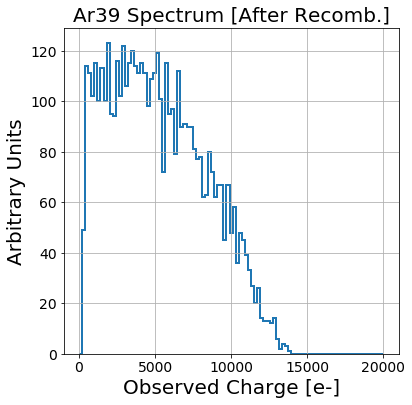

In [72]:
fig = plt.figure(figsize=(6,6))
plt.hist(Ar39_Q_v,bins=np.linspace(0,2e4,100),histtype='step',lw=2)
plt.grid()
plt.xlabel('Observed Charge [e-]',fontsize=20)
plt.ylabel('Arbitrary Units',fontsize=20)
plt.title('Ar39 Spectrum [After Recomb.]',fontsize=20)
plt.show()

In [73]:
elec_KE = np.linspace(0.05,1,100)
elec_Q_273 = []
elec_Q_500 = []
for ke in elec_KE:
    elec_Q_273.append(Charge(ke,0.273)/1e3)
    elec_Q_500.append(Charge(ke,0.500)/1e3)

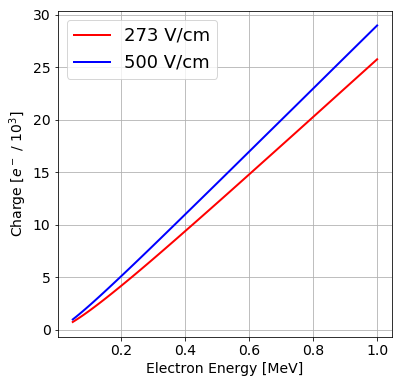

In [74]:
fig = plt.figure(figsize=(6,6))
plt.plot(elec_KE,elec_Q_273,lw=2,color='r',label='273 V/cm')
plt.plot(elec_KE,elec_Q_500,lw=2,color='b',label='500 V/cm')
plt.grid()
plt.xlabel('Electron Energy [MeV]')
plt.ylabel('Charge [$e^-$ / $10^3$]')
plt.legend(loc=2,fontsize=18)
plt.show()

In [75]:
print Charge(0.2,0.273)


4129.221044959042


In [76]:
def E_recoY_off(df,gain):
    YQ_off = df['sps_cluster_charge50']
    QrecoY_off = YQ_off * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off = fQ2E(QrecoY_off)
    return ErecoY_off

def E_recoY_on(df,gain):
    YQ_on  = df['sps_cluster_charge50']
    QrecoY_on = YQ_on * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_on = fQ2E(QrecoY_on)
    return ErecoY_on

def E_recoY_MC(df,gain):
    YQ_MC  = df['sps_cluster_charge50']
    QrecoY_MC = YQ_MC * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_MC = fQ2E(QrecoY_MC)
    return ErecoY_MC
    
def E_recoY_off_G10(df,gain):
    YQ_off_G10  = df['sps_cluster_charge']
    QrecoY_off_G10 = YQ_off_G10 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off_G10 = fQ2E(QrecoY_off_G10)
    return ErecoY_off_G10

def E_recoY_off_rest_det(df,gain):
    YQ_off_rest_det  = df['sps_cluster_charge']
    QrecoY_off_rest_det = YQ_off_rest_det * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off_rest_det = fQ2E(QrecoY_off_rest_det)
    return ErecoY_off_rest_det
  
    #E_r=0.01 # MeV
    #while E_r<10:
    #    Eff_Recomb = EffectiveRecomb(E_r,0.01,0.273)
    #    Q_hypo=Eff_Recomb*E_r # MeV
    #    if Q_hypo>Qreco:
    #        return E_r
    #    E_r+=0.01
    #    
def E_reco_simple(YQ,gain):
    #YQ = df['Y_cluster_charge']
    Qreco = YQ * gain * (23.6/1e6) # MeV w/ no recomb factor
    E_r=0.01 # MeV
    while E_r<10:
        Eff_Recomb = EffectiveRecomb(E_r,0.01,0.273)
        Q_hypo=Eff_Recomb*E_r # MeV
        if Q_hypo>Qreco:
            return E_r
        E_r+=0.01

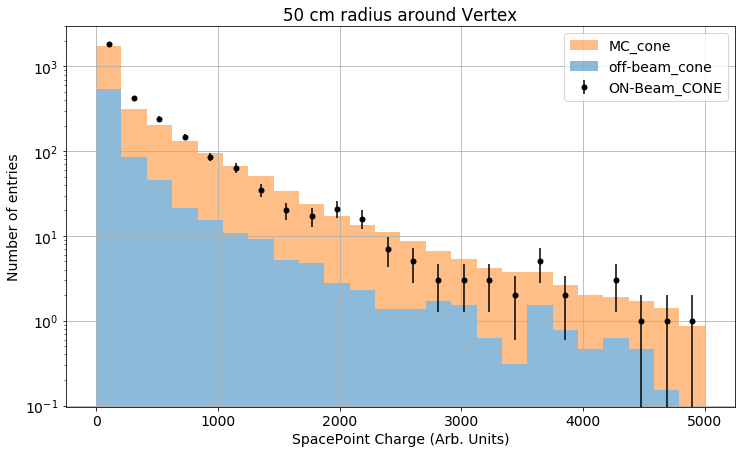

<Figure size 432x288 with 0 Axes>

In [77]:
fig = plt.figure(figsize=(12,7))
BINS = np.linspace(0,5000,25)
xstacked = [df_Event_beam_off_cone['sps_cluster_charge50'].values,df_Event_MC_cone['sps_cluster_charge50'].values]
LABELS = ['off-beam_cone','MC_cone']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event_cone,stacked=True,alpha=0.5)
vals,bine = np.histogram(df_Event_beam_on_cone['sps_cluster_charge50'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
plt.yscale('log')
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON-Beam_CONE')
plt.title("50 cm radius around Vertex")
plt.xlabel('SpacePoint Charge (Arb. Units)')
plt.ylabel('Number of entries')
plt.legend(loc=1)
plt.grid()

plt.show()
plt.draw()
fig.savefig('Charge_50cm', dpi=400)

In [78]:

df_sps_charge_50_off=df_Event_beam_off_cone.query('sps_cluster_charge50 * 238.4 < 130000. and sps_cluster_charge50 > 0.')
df_sps_charge_50_off['energy']=E_recoY_off(df_sps_charge_50_off,238.4)

df_sps_charge_50_on=df_Event_beam_on_cone.query('sps_cluster_charge50 * 238.4 < 130000. and sps_cluster_charge50 > 0.')
df_sps_charge_50_on['energy']=E_recoY_on(df_sps_charge_50_on,238.4)

df_sps_charge_50_MC=df_Event_MC_cone.query('sps_cluster_charge50 * 238.4 < 130000. and sps_cluster_charge50 > 0.')
df_sps_charge_50_MC['energy']=E_recoY_MC(df_sps_charge_50_MC,238.4)




/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [79]:

nOFF_Event_cone = len(df_sps_charge_50_off['energy'])
weightsOFF_Event_cone = np.ones(nOFF_Event_cone) * off_scaling_cone # factor needed to scale off-beam to on-beam


nMC_Event_cone = len(df_sps_charge_50_MC['energy'])
weightsMC_Event_cone = np.ones(nMC_Event_cone) * MC_scaling_cone # factor needed to scale MC to on-beam

WEIGHTS_Event_cone = [weightsOFF_Event_cone,weightsMC_Event_cone]

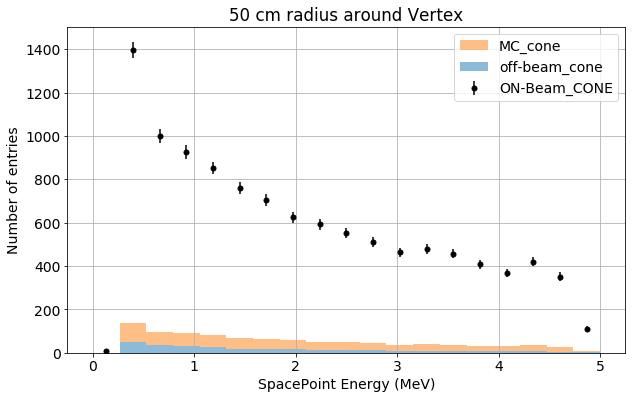

<Figure size 432x288 with 0 Axes>

In [80]:
fig = plt.figure(figsize=(10,6))
BINS=np.linspace(0,5,20)
xstacked = [df_sps_charge_50_off['energy'].values,df_sps_charge_50_MC['energy'].values]
LABELS = ['off-beam_cone','MC_cone']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,stacked=True,alpha=0.5,weights=WEIGHTS_Event_cone)

vals,bine = np.histogram(df_sps_charge_50_MC['energy'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
#plt.yscale('log')
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON-Beam_CONE')
plt.title("50 cm radius around Vertex")
plt.xlabel('SpacePoint Energy (MeV)')
plt.ylabel('Number of entries')
plt.legend(loc=1)
plt.grid()

plt.show()
plt.draw()
fig.savefig('Charge_50cm', dpi=400)

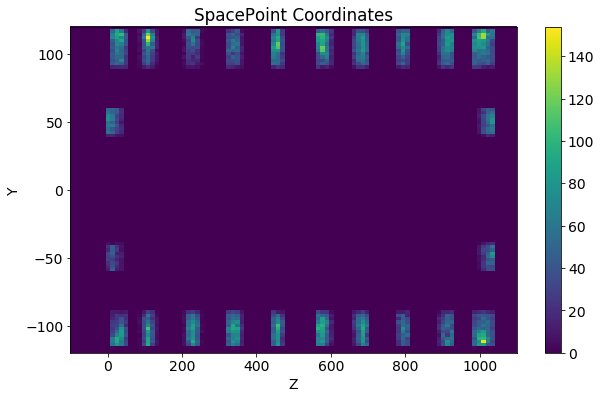

44473
32192
1


In [81]:
df_G10_off_cut=df_Sps_beam_off_cone.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>980 and sps_z<1100) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
df_rest_det_off_cut=df_Sps_beam_off_cone.query('(sps_y > -90.0 and sps_y < 90.0) and (sps_z>20 and sps_z<1000) ')


fig = plt.figure(figsize=(10,6))
plt.hist2d(df_G10_off_cut['sps_z'].values,df_G10_off_cut['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SpacePoint Coordinates")
plt.xlabel('Z')
plt.ylabel('Y')


plt.show()



print df_G10_off_cut.shape[0]
print df_Event_MC_cone.shape[0]
print (df_G10_off_cut.shape[0]/df_Event_MC_cone.shape[0])

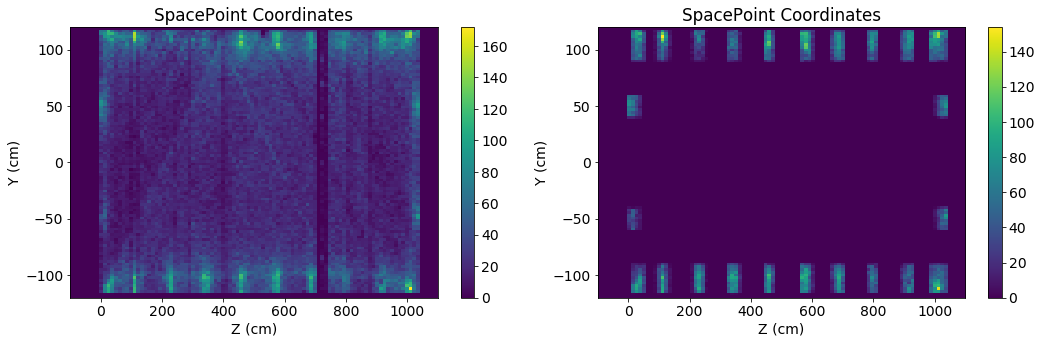

In [82]:
fig = plt.figure(figsize=(15,5))
df_G10_off=df_Sps_beam_off.query('sps_y < -90.0 or sps_y > 90.0')


plt.subplot(1, 2, 1)

plt.hist2d(df_Sps_beam_off['sps_z'].values,df_Sps_beam_off['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SpacePoint Coordinates")
plt.xlabel('Z (cm)')
plt.ylabel('Y (cm)')


plt.subplot(1, 2, 2)

plt.hist2d(df_G10_off_cut['sps_z'].values,df_G10_off_cut['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SpacePoint Coordinates")
plt.xlabel('Z (cm)')
plt.ylabel('Y (cm)')

plt.tight_layout()
plt.show()
fig.savefig('Isolation.png', dpi=400)

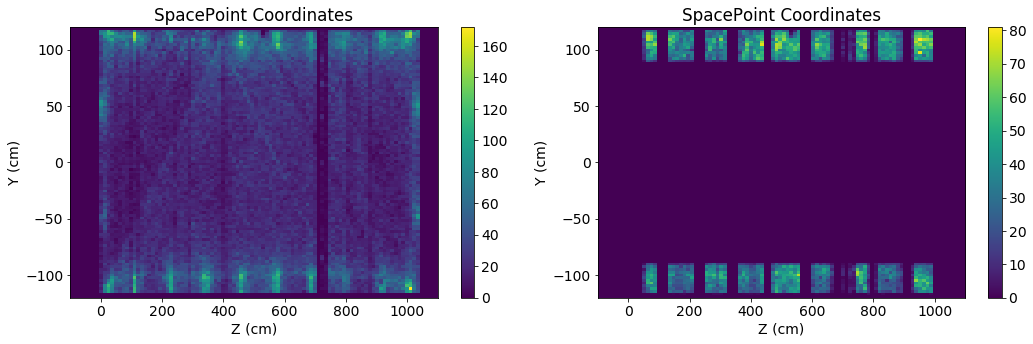

In [83]:
fig = plt.figure(figsize=(15,5))
df_G10_off=df_Sps_beam_off.query('sps_y < -90.0 or sps_y > 90.0')
df_G10_off_complementary=df_Sps_beam_off_cone.query('((sps_y < -90.0 or sps_y > 90.0) and ( (sps_z>50 and sps_z<90) or (sps_z>130 and sps_z<210) or (sps_z>250 and sps_z<320) or (sps_z>360 and sps_z<440) or (sps_z>470 and sps_z<560) or (sps_z>600 and sps_z<660) or (sps_z>700 and sps_z<780) or (sps_z>810 and sps_z<890) or (sps_z>930 and sps_z<990) or (sps_z>1100 ) ))  ')


plt.subplot(1, 2, 1)

plt.hist2d(df_Sps_beam_off['sps_z'].values,df_Sps_beam_off['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SpacePoint Coordinates")
plt.xlabel('Z (cm)')
plt.ylabel('Y (cm)')


plt.subplot(1, 2, 2)

plt.hist2d(df_G10_off_complementary['sps_z'].values,df_G10_off_complementary['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SpacePoint Coordinates")
plt.xlabel('Z (cm)')
plt.ylabel('Y (cm)')

plt.tight_layout()
plt.show()
fig.savefig('Isolation.png', dpi=400)

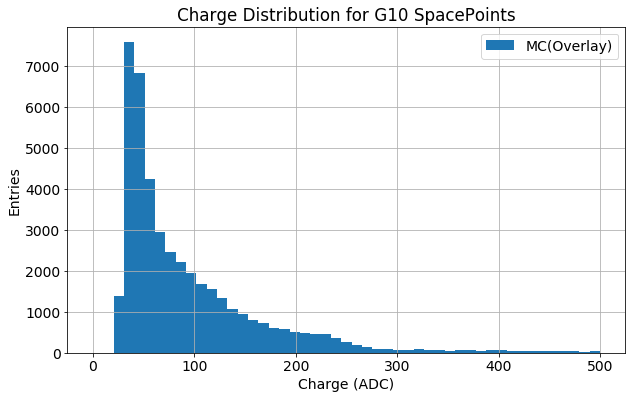

In [84]:
fig = plt.figure(figsize=(10,6))
BINS=np.linspace(0,500,50)
plt.hist(df_G10_off_cut['sps_cluster_charge'].values,bins=BINS,histtype='stepfilled',label='MC(Overlay)')
plt.title("Charge Distribution for G10 SpacePoints")
plt.xlabel('Charge (ADC)')
plt.ylabel('Entries')
plt.legend(loc=1)
plt.grid()
plt.show()

/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


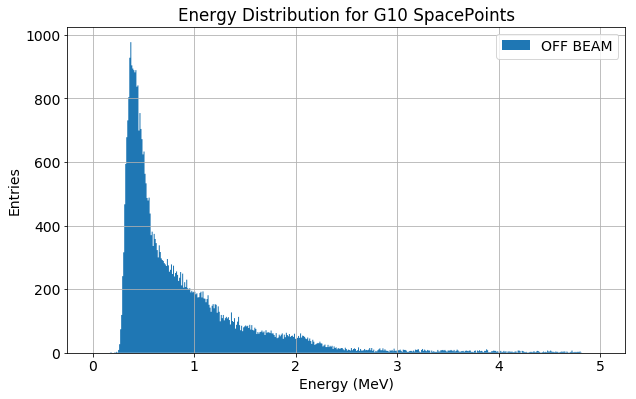

In [85]:
df_sps_charge_off_G10=df_G10_off_cut.query('sps_cluster_charge * 238.4 < 130000. and sps_cluster_charge > 0.')
df_sps_charge_off_G10['energy']=E_recoY_off_G10(df_sps_charge_off_G10,238.4)
fig = plt.figure(figsize=(10,6))
BINS=np.linspace(0,5,500)
plt.hist(df_sps_charge_off_G10['energy'].values,bins=BINS,histtype='stepfilled',label='OFF BEAM')
plt.title("Energy Distribution for G10 SpacePoints")
plt.xlabel('Energy (MeV)')
plt.ylabel('Entries')
plt.legend(loc=1)
plt.grid()
plt.show()

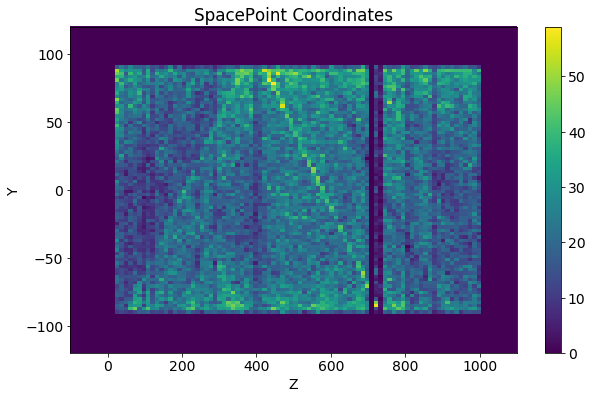

In [86]:
fig = plt.figure(figsize=(10,6))
plt.hist2d(df_rest_det_off_cut['sps_z'].values,df_rest_det_off_cut['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SpacePoint Coordinates")
plt.xlabel('Z')
plt.ylabel('Y')


plt.show()

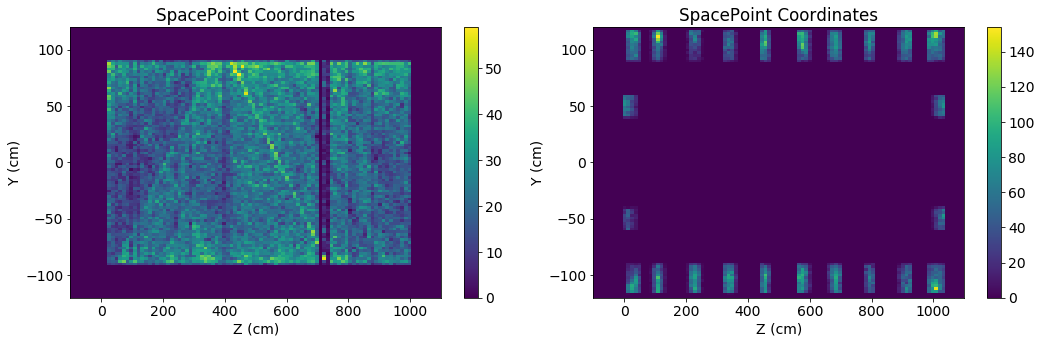

In [87]:
fig = plt.figure(figsize=(15,5))
df_G10_off=df_Sps_beam_off.query('sps_y < -90.0 or sps_y > 90.0')


plt.subplot(1, 2, 1)

plt.hist2d(df_rest_det_off_cut['sps_z'].values,df_rest_det_off_cut['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SpacePoint Coordinates")
plt.xlabel('Z (cm)')
plt.ylabel('Y (cm)')


plt.subplot(1, 2, 2)

plt.hist2d(df_G10_off_cut['sps_z'].values,df_G10_off_cut['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SpacePoint Coordinates")
plt.xlabel('Z (cm)')
plt.ylabel('Y (cm)')

plt.tight_layout()
plt.show()
fig.savefig('Isolation_comp.png', dpi=400)

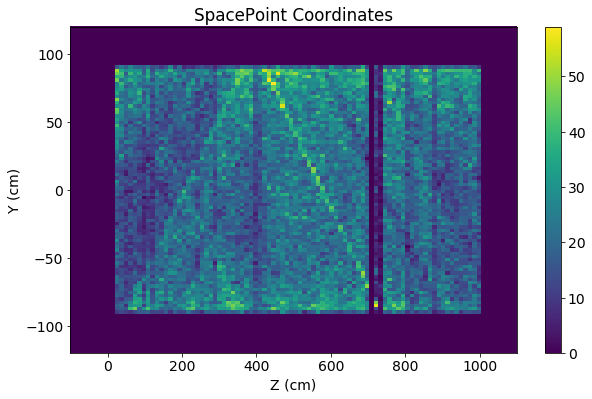

In [88]:
fig = plt.figure(figsize=(10,6))
df_G10_off=df_Sps_beam_off.query('sps_y < -90.0 or sps_y > 90.0')


#plt.subplot(1, 2, 1)

plt.hist2d(df_rest_det_off_cut['sps_z'].values,df_rest_det_off_cut['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SpacePoint Coordinates")
plt.xlabel('Z (cm)')
plt.ylabel('Y (cm)')


# plt.subplot(1, 2, 2)

# plt.hist2d(df_G10_off_cut['sps_z'].values,df_G10_off_cut['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
# plt.colorbar()
# plt.title("SpacePoint Coordinates")
# plt.xlabel('Z (cm)')
# plt.ylabel('Y (cm)')

# plt.tight_layout()
plt.show()
fig.savefig('Isolation_comp1.png', dpi=400)

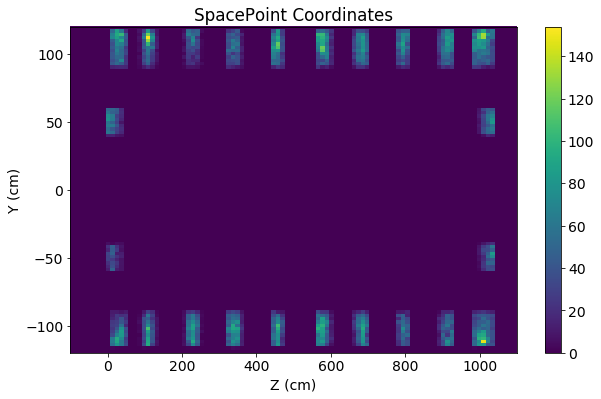

In [89]:
fig = plt.figure(figsize=(10,6))
plt.hist2d(df_G10_off_cut['sps_z'].values,df_G10_off_cut['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SpacePoint Coordinates")
plt.xlabel('Z (cm)')
plt.ylabel('Y (cm)')

# plt.tight_layout()
plt.show()
fig.savefig('Isolation_comp2.png', dpi=400)

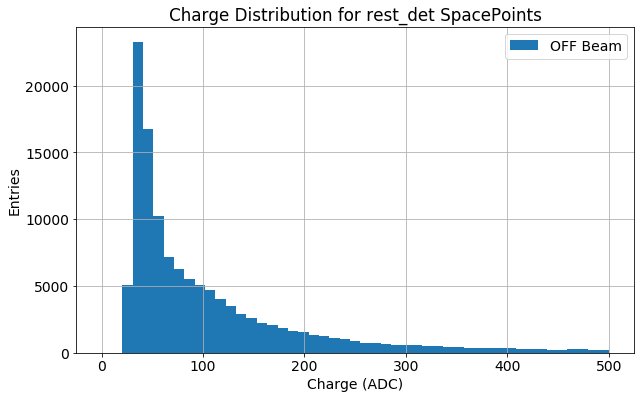

In [90]:
fig = plt.figure(figsize=(10,6))
BINS=np.linspace(0,500,50)
plt.hist(df_rest_det_off_cut['sps_cluster_charge'].values,bins=BINS,histtype='stepfilled',label='OFF Beam')
plt.title("Charge Distribution for rest_det SpacePoints")
plt.xlabel('Charge (ADC)')
plt.ylabel('Entries')
plt.legend(loc=1)
plt.grid()
plt.show()

/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


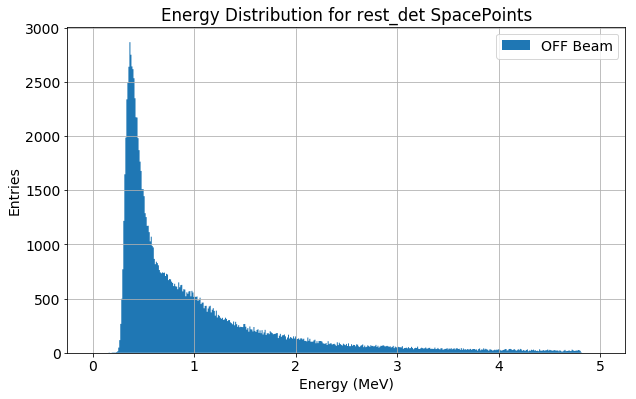

In [91]:
df_sps_charge_off_rest_det=df_rest_det_off_cut.query('sps_cluster_charge * 238.4 < 130000. and sps_cluster_charge > 3.')
df_sps_charge_off_rest_det['energy']=E_recoY_off_rest_det(df_sps_charge_off_rest_det,238.4)
fig = plt.figure(figsize=(10,6))
BINS=np.linspace(0,5,500)
plt.hist(df_sps_charge_off_rest_det['energy'].values,bins=BINS,histtype='stepfilled',label='OFF Beam')
plt.title("Energy Distribution for rest_det SpacePoints")
plt.xlabel('Energy (MeV)')
plt.ylabel('Entries')
plt.legend(loc=1)
plt.grid()
plt.show()

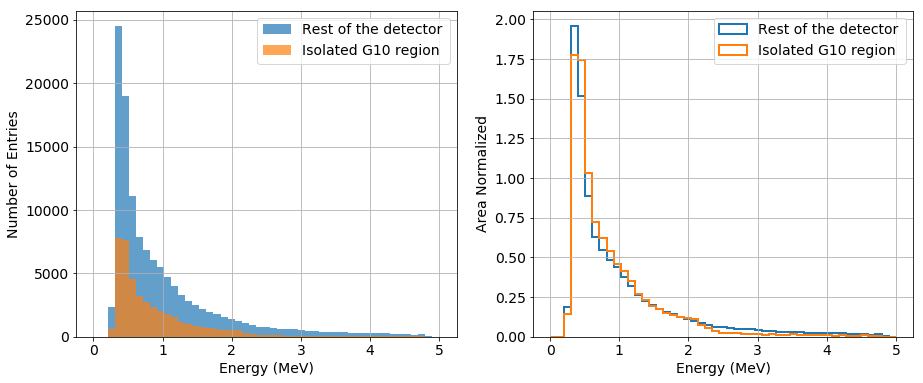

In [92]:
fig = plt.figure(figsize=(15,6))

BINS=np.linspace(0,5,50)
plt.subplot(1, 2, 1)


plt.hist(df_sps_charge_off_rest_det['energy'].values,bins=BINS,histtype='stepfilled',label='Rest of the detector',alpha=0.7)
plt.hist(df_sps_charge_off_G10['energy'].values,bins=BINS,histtype='stepfilled',label='Isolated G10 region ',alpha=0.7)
#plt.title("Energy Distribution for SpacePoints")
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of Entries')
plt.legend(loc=1)
plt.grid()


plt.subplot(1, 2, 2)


plt.hist(df_sps_charge_off_rest_det['energy'].values,bins=BINS,histtype='step',label='Rest of the detector',alpha=1,density=True,lw=2)
plt.hist(df_sps_charge_off_G10['energy'].values,bins=BINS,histtype='step',label='Isolated G10 region ',alpha=1,density=True,lw=2)
#plt.title("Energy Distribution for SpacePoints")
plt.xlabel('Energy (MeV)')
plt.ylabel('Area Normalized')
plt.legend(loc=1)
plt.grid()
plt.show()
fig.savefig('Energy_comp.png', dpi=400)

In [93]:
from scipy.stats import chisquare as chi2

In [94]:
obs =df_sps_charge_off_G10['energy']
exp=df_sps_charge_off_rest_det['energy']
exp.shape


(122610,)

In [95]:
obs.shape

(43066,)

In [96]:
n_exp = len(df_sps_charge_off_rest_det['energy'])
n_obs = len(df_sps_charge_off_G10['energy'])
weights_exp = np.ones(n_exp) * (1/(n_obs)) # factor needed to scale off-beam to on-beam


In [97]:
expected= (np.exp,weights_exp)


In [98]:
myfile_beam_off_radio='/uboone/data/users/abhat/GammaCatcher/radioactivity_off_beam_hadd.root'
#myfile_beam_off_radio='/uboone/data/users/abhat/GammaCatcher/low_threshold_cluster_track_distance_v04_NO_CONE.root'
myfile_beam_off_radio_run3='/uboone/data/users/abhat/GammaCatcher/radioactivity_off_beam_run3_hadd.root'

In [99]:
##MCC9 BEAM OFF DATA
df_Event_beam_off_radio = pd.DataFrame( root2array( myfile_beam_off_radio,BRANCH_EVT) )
df_Sps_beam_off_radio = pd.DataFrame( root2array( myfile_beam_off_radio,BRANCH_SPS) )

df_Event_beam_off_radio = df_Event_beam_off_radio.query(NUSELECTION)
df_Sps_beam_off_radio = df_Sps_beam_off_radio.query(NUSELECTION)
#df_Sps_beam_off_rand_radio = df_Sps_beam_off_radio.query(NUSELECTION_rand)
df_Event_beam_off_rand_radio = df_Event_beam_off_radio.query(NUSELECTION_rand)
print df_Event_beam_off_radio.shape[0]
print df_Sps_beam_off_radio.shape[0]

/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/root_numpy/_tree.py:241: RuntimeWarning: ignoring duplicate branch named 'N_Run'
  warn_missing_tree)
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/root_numpy/_tree.py:241: RuntimeWarning: ignoring duplicate branch named 'N_SubRun'
  warn_missing_tree)


6742
312140


In [100]:
##MCC9 BEAM OFF DATA
df_Event_beam_off_radio_run3 = pd.DataFrame( root2array( myfile_beam_off_radio_run3,BRANCH_EVT) )
df_Sps_beam_off_radio_run3 = pd.DataFrame( root2array( myfile_beam_off_radio_run3,BRANCH_SPS) )

df_Event_beam_off_radio_run3 = df_Event_beam_off_radio_run3.query(NUSELECTION)
df_Sps_beam_off_radio_run3 = df_Sps_beam_off_radio_run3.query(NUSELECTION)
#df_Sps_beam_off_rand_radio = df_Sps_beam_off_radio.query(NUSELECTION_rand)
df_Event_beam_off_rand_radio_run3 = df_Event_beam_off_radio_run3.query(NUSELECTION_rand)
print df_Event_beam_off_radio_run3.shape[0]
print df_Sps_beam_off_radio_run3.shape[0]

468
21486


In [101]:
df_Event_beam_off_radio_run3.head()

,evttime,Vertex_x,Vertex_y,Vertex_z,_rand_vtx_x,_rand_vtx_y,_rand_vtx_z,distance_smallest,N_sps,Event_cluster_charge,...,neutrinotracks,muon_px,muon_py,muon_pz,maxTrkLen,tracklength,distance_nu_smallest,cosmic_trk_50,N_Run,N_SubRun
93,1530834923,51.148335,8.229452,512.235474,159.913877,-85.690299,664.566754,17.292118,50,301.431946,...,2,0.293303,0.853365,0.430978,114.731384,257.180128,61.357758,0,17552,175
108,1530905755,133.438721,12.152811,865.425964,207.796890,-106.539605,121.425678,31.635589,41,141.446564,...,2,0.205019,0.933498,0.294191,112.122314,237.288710,76.337079,0,17561,64
422,1530147654,182.222305,20.921387,154.012833,41.708405,-38.266779,980.379445,59.367856,35,764.065979,...,2,-0.664306,-0.576257,-0.476052,245.361725,229.524247,82.090479,0,17451,230
574,1530771742,52.486095,25.914143,225.117844,152.283545,3.536768,340.614314,104.615204,51,387.114594,...,2,-0.262298,-0.625837,0.734525,59.717285,258.899034,77.079910,0,17534,132
609,1529840995,93.794281,20.785036,236.368195,93.693088,-78.692350,473.909989,36.495716,52,223.443207,...,2,-0.155465,0.879206,-0.450364,53.376003,53.376005,54.813685,0,17371,229


In [102]:
df_Sps_beam_off_radio_run3.head()

,evttime,sps_x,sps_y,sps_z,distance,sps_cluster_charge,N_Event,N_Run,N_SubRun,Vertex_x,...,neutrinos,neutrinoshowers,neutrinotracks,muon_px,muon_py,muon_pz,maxTrkLen,tracklength,distance_nu_smallest,cosmic_trk_50
3767,1530834923,175.612778,60.206139,7.704256,522.249675,91.782692,8763,17552,175,51.148335,...,1,0,2,0.293303,0.853365,0.430978,114.731384,257.180128,61.357758,0
3768,1530834923,46.524750,15.172816,12.900000,499.405150,78.897896,8763,17552,175,51.148335,...,1,0,2,0.293303,0.853365,0.430978,114.731384,257.180128,61.357758,0
3769,1530834923,173.663544,-95.938240,68.400002,472.070769,34.213284,8763,17552,175,51.148335,...,1,0,2,0.293303,0.853365,0.430978,114.731384,257.180128,61.357758,0
3770,1530834923,173.418625,-98.536316,72.697678,468.553548,114.374367,8763,17552,175,51.148335,...,1,0,2,0.293303,0.853365,0.430978,114.731384,257.180128,61.357758,0
3771,1530834923,161.446823,81.077347,223.199997,317.827121,46.314617,8763,17552,175,51.148335,...,1,0,2,0.293303,0.853365,0.430978,114.731384,257.180128,61.357758,0


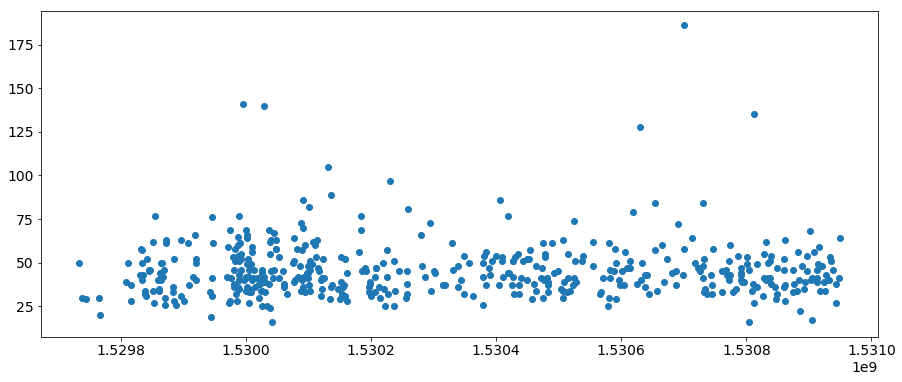

In [103]:
#df_date_time=pd.to_datetime(df_Event_beam_off_radio_run3['evttime'],unit='s').apply(lambda x: x.date())
fig = plt.figure(figsize=(15,6))
plt.scatter(df_Event_beam_off_radio_run3['evttime'].values,df_Event_beam_off_radio_run3['N_sps'].values )
plt.show()

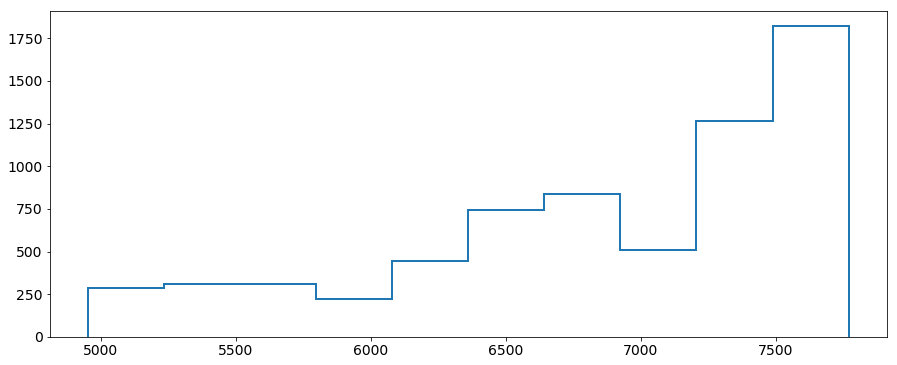

('t0: ', 4952)
('t_max: ', 7770)
('t_max-t0: ', 2818)


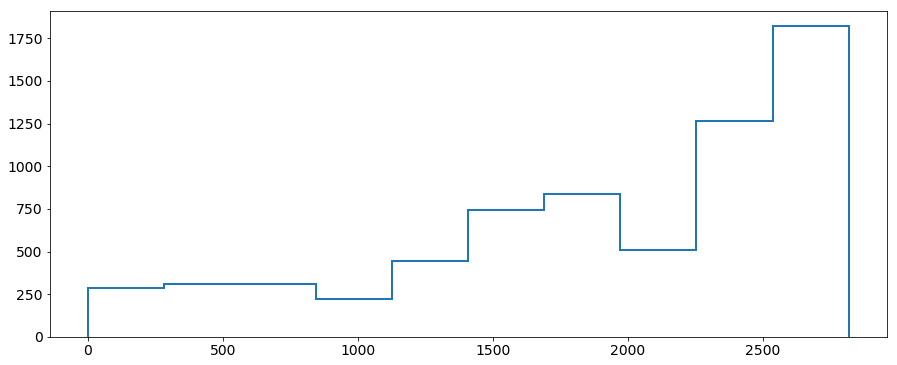

0
2818


In [104]:
fig = plt.figure(figsize=(15,6))
#BINS=np.linspace(4000,8000,4002)
plt.hist(df_Event_beam_off_radio['N_Run'].values,histtype='step',label='Run Numbers',alpha=1,lw=2)
plt.show()
t0=(df_Event_beam_off_radio['N_Run'].min())
t_max=(df_Event_beam_off_radio['N_Run'].max())
print('t0: ',t0)
print('t_max: ',t_max)
print('t_max-t0: ',t_max-t0)
df_time=df_Event_beam_off_radio['N_Run']-t0
fig = plt.figure(figsize=(15,6))

plt.hist(df_time,histtype='step',label='Time',alpha=1,lw=2)

plt.show()
print(df_time.min())
print(df_time.max())

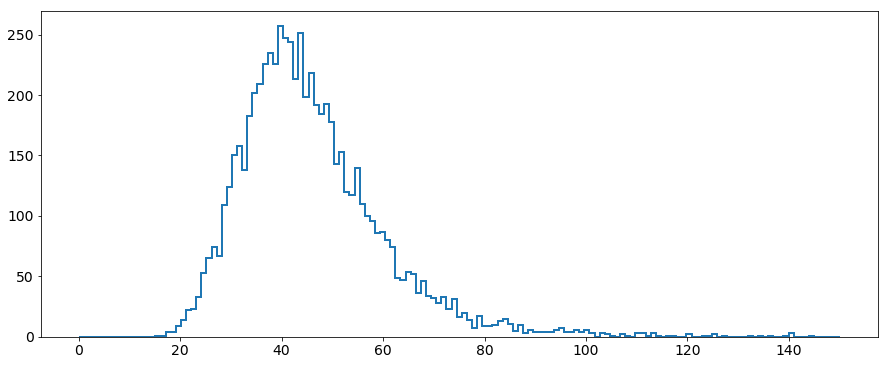

In [105]:

fig = plt.figure(figsize=(15,6))
BINS=np.linspace(0,150,150)
plt.hist(df_Event_beam_off_radio['N_sps'].values,bins=BINS,histtype='step',alpha=1,lw=2)
plt.show()

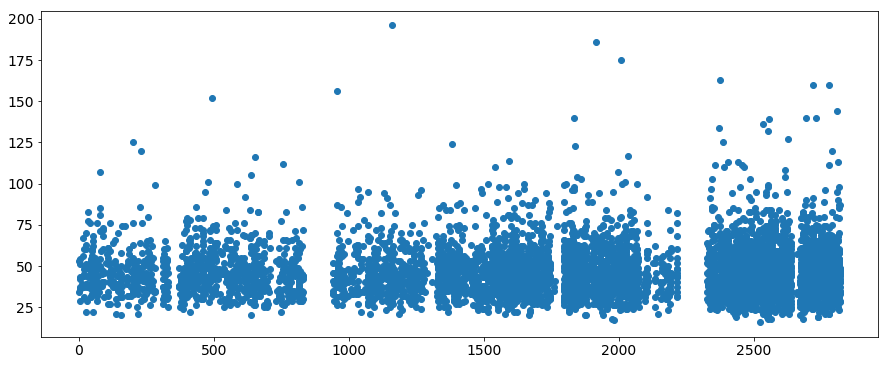

In [106]:
fig = plt.figure(figsize=(15,6))
#df_radio_check=[df_time,df_Event_beam_off_radio['N_sps']]
#df.plot(x='df_time', y='N_sps', style='o')
plt.scatter(df_time, df_Event_beam_off_radio['N_sps'].values)
plt.show()

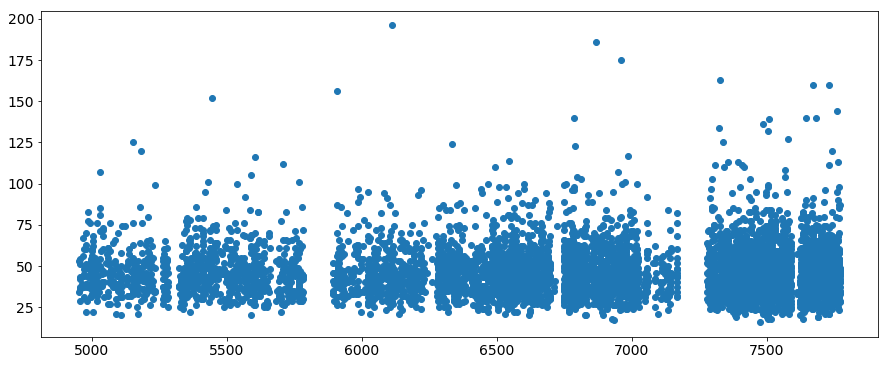

In [107]:
fig = plt.figure(figsize=(15,6))
#df_radio_check=[df_Event_beam_off_radio['N_Run'].values,df_Event_beam_off_radio['N_sps']]
#df.plot(x='df_time', y='N_sps', style='o')
#result = df_Event_beam_off_radio['N_Run'].values.append(df_Event_beam_off_radio['N_sps'])
plt.scatter(df_Event_beam_off_radio['N_Run'].values, df_Event_beam_off_radio['N_sps'].values)
plt.show()

In [108]:
df_average=df_Event_beam_off_radio.groupby('N_Run').mean().reset_index()
df_average.head()

,N_Run,Vertex_x,Vertex_y,Vertex_z,_rand_vtx_x,_rand_vtx_y,_rand_vtx_z,distance_smallest,N_sps,Event_cluster_charge,...,neutrinoshowers,neutrinotracks,muon_px,muon_py,muon_pz,maxTrkLen,tracklength,distance_nu_smallest,cosmic_trk_50,N_SubRun
0,4952,110.395962,-16.753756,443.424599,149.615202,-64.397748,265.384042,105.212642,43.5,52.042283,...,0.0,2.500000,0.526909,0.668247,0.400978,120.577957,177.445178,96.560197,0.0,56.00
1,4955,146.137288,21.509471,413.411964,182.325043,15.605955,381.245066,42.454993,36.0,244.244935,...,0.0,2.333333,-0.019394,0.870616,0.114478,99.219193,249.240904,108.396762,0.0,31.00
2,4957,134.882662,4.421289,463.187691,131.005072,-11.999303,675.498369,63.327718,46.0,175.331553,...,0.0,2.000000,0.281696,0.654426,0.005158,133.255646,259.007221,95.568124,0.0,84.25
3,4962,98.215328,-30.793934,386.717514,42.173460,-76.277748,274.360195,46.111308,38.5,2733.144867,...,0.0,2.500000,-0.388954,0.715595,0.547968,183.946167,184.195133,140.937346,0.0,125.50
4,4967,62.704624,-38.031998,696.753479,182.754576,-92.898312,720.245212,49.539125,67.0,123.022888,...,0.0,3.000000,-0.290197,0.809010,0.511165,46.058739,237.513101,76.515532,0.0,32.00


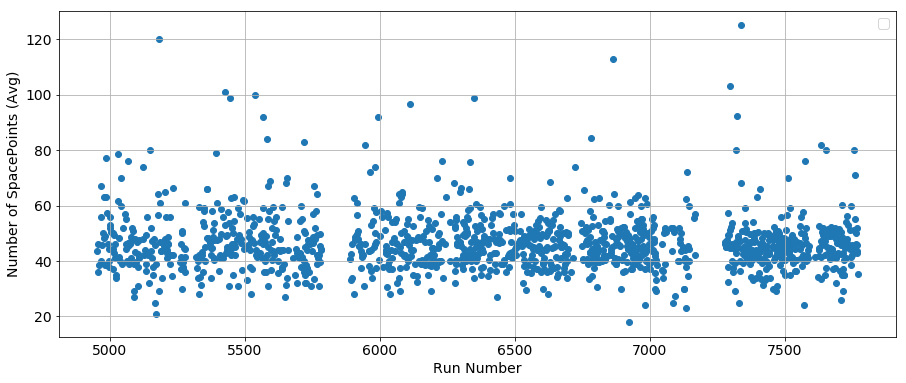

In [109]:
fig = plt.figure(figsize=(15,6))

plt.scatter(df_average['N_Run'].values, df_average['N_sps'].values)
plt.xlabel('Run Number')
plt.ylabel('Number of SpacePoints (Avg)')
plt.legend(loc=1)
plt.grid()
plt.show()


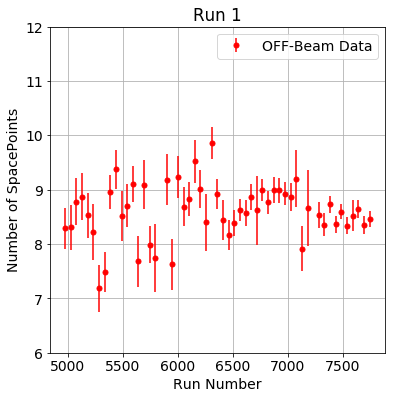

In [110]:
RUN_MIN = 4952
RUN_MAX = 7770

BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/50)#Bin width~10 
#vals,bine = np.histogram(N_event['N_Run'].values,bins=BINS)
#binc = 0.5*(bine[1:]+bine[:-1])
#vals = vals.astype(float)

BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    # implement the code you had before to get EFFICIENCY
    N_event = (df_Event_beam_off_radio.query('N_Run > %i and N_Run < %i'%(BIN_MIN,BIN_MAX)))
    N_event_shape= N_event.shape[0]
    if (N_event_shape == 0): continue
    N_G10   = (df_Sps_beam_off_radio.query('(N_Run > %i and N_Run < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10 =N_G10.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))') 
    N_G10_shape= N_G10.shape[0]
    Rate = N_G10_shape / float(N_event_shape)
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_shape)/N_event_shape)
fig = plt.figure(figsize=(6,6))
#plt.scatter(BIN_CENTER_V,BIN_EFF_V)
plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data')
plt.ylim(6,12)
plt.xlabel('Run Number')
plt.ylabel('Number of SpacePoints')
plt.title("Run 1")
plt.legend(loc=1)
plt.grid()
plt.show()


In [111]:
np.arctan(5/4)# half cone opening angle with radius of cylinder 5 cm and Height of cone as 4 cm


0.7853981633974483

In [112]:
np.degrees(0.7853981633974483) # Cone opening angle is double of this angle

45.0

In [113]:
##MCC9 BEAM OFF DATA RUN3
df_Event_beam_off_radio_run3 = pd.DataFrame( root2array( myfile_beam_off_radio_run3,BRANCH_EVT) )
df_Sps_beam_off_radio_run3 = pd.DataFrame( root2array( myfile_beam_off_radio_run3,BRANCH_SPS) )

df_Event_beam_off_radio_run3 = df_Event_beam_off_radio_run3.query(NUSELECTION)
df_Sps_beam_off_radio_run3 = df_Sps_beam_off_radio_run3.query(NUSELECTION)
#df_Sps_beam_off_rand_radio = df_Sps_beam_off_radio.query(NUSELECTION_rand)
df_Event_beam_off_rand_radio_run3 = df_Event_beam_off_radio_run3.query(NUSELECTION_rand)
print df_Event_beam_off_radio_run3.shape[0]
print df_Sps_beam_off_radio_run3.shape[0]

468
21486


In [114]:
result_df_Event = df_Event_beam_off_radio.append(df_Event_beam_off_radio_run3)

/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/pandas/core/frame.py:6701: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [115]:
result_df_Sps = df_Sps_beam_off_radio.append(df_Sps_beam_off_radio_run3)

In [116]:
result_df_Event['N_Run'].min()

4952

In [117]:
result_df_Event['N_Run'].max()

17566

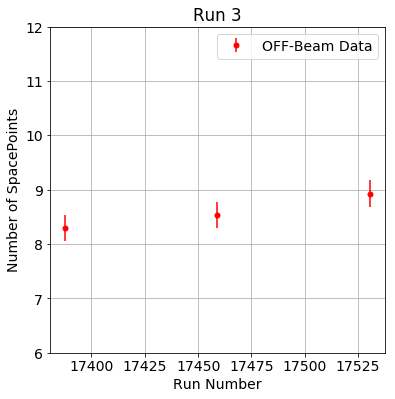

In [118]:
RUN_MIN = df_Event_beam_off_radio_run3['N_Run'].min()
RUN_MAX = df_Event_beam_off_radio_run3['N_Run'].max()

BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/50)#Bin width~10 
#vals,bine = np.histogram(N_event['N_Run'].values,bins=BINS)
#binc = 0.5*(bine[1:]+bine[:-1])
#vals = vals.astype(float)

BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    # implement the code you had before to get EFFICIENCY
    N_event = (df_Event_beam_off_radio_run3.query('N_Run > %i and N_Run < %i'%(BIN_MIN,BIN_MAX)))
    N_event_shape= N_event.shape[0]
    if (N_event_shape == 0): continue
    N_G10   = (df_Sps_beam_off_radio_run3.query('(N_Run > %i and N_Run < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10 =N_G10.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))') 
    N_G10_shape= N_G10.shape[0]
    Rate = N_G10_shape / float(N_event_shape)
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_shape)/N_event_shape)
fig = plt.figure(figsize=(6,6))
#plt.scatter(BIN_CENTER_V,BIN_EFF_V)
plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data')
plt.ylim(6,12)
plt.xlabel('Run Number')
plt.ylabel('Number of SpacePoints')
plt.title("Run 3")
plt.legend(loc=1)
plt.grid()
plt.show()


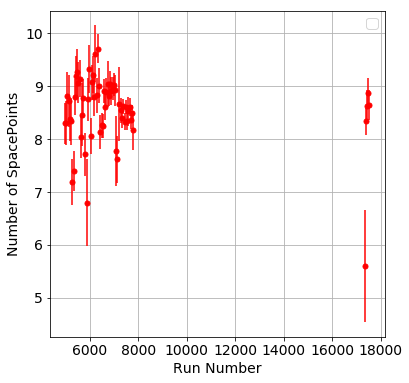

In [119]:
RUN_MIN = result_df_Event['N_Run'].min()
RUN_MAX = result_df_Event['N_Run'].max()

BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/50)#Bin width~10 
#vals,bine = np.histogram(N_event['N_Run'].values,bins=BINS)
#binc = 0.5*(bine[1:]+bine[:-1])
#vals = vals.astype(float)

BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    # implement the code you had before to get EFFICIENCY
    N_event = (result_df_Event.query('N_Run > %i and N_Run < %i'%(BIN_MIN,BIN_MAX)))
    N_event_shape= N_event.shape[0]
    if (N_event_shape == 0): continue
    N_G10   = (result_df_Sps.query('(N_Run > %i and N_Run < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10 =N_G10.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))') 
    N_G10_shape= N_G10.shape[0]
    Rate = N_G10_shape / float(N_event_shape)
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_shape)/N_event_shape)
fig = plt.figure(figsize=(6,6))
#plt.scatter(BIN_CENTER_V,BIN_EFF_V)
plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5)
plt.xlabel('Run Number')
plt.ylabel('Number of SpacePoints')
plt.legend(loc=1)
plt.grid()
plt.show()


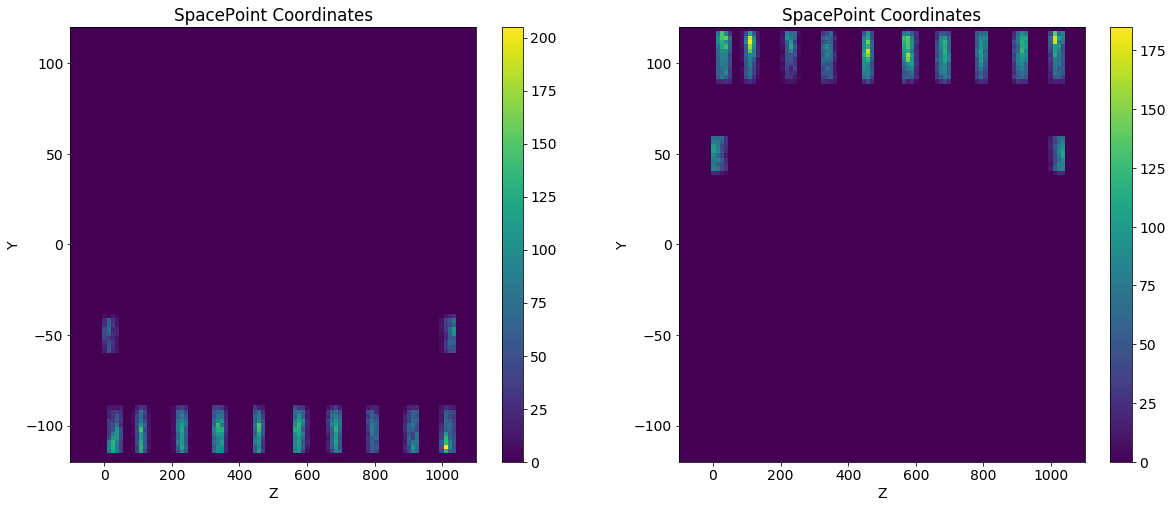

In [120]:
#df_G10_off_cut=df_Sps_beam_off_cone.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
df_G10_off_bottom=df_Sps_beam_off_radio.query('((sps_y < -90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
df_G10_off_top=df_Sps_beam_off_radio.query('((sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')

fig = plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.hist2d(df_G10_off_bottom['sps_z'].values,df_G10_off_bottom['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SpacePoint Coordinates")
plt.xlabel('Z')
plt.ylabel('Y')




plt.subplot(1, 2, 2)
plt.hist2d(df_G10_off_top['sps_z'].values,df_G10_off_top['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SpacePoint Coordinates")
plt.xlabel('Z')
plt.ylabel('Y')

plt.show()

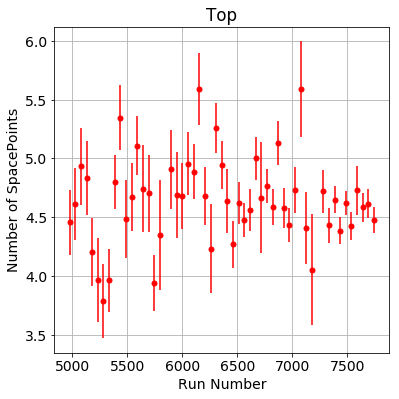

In [121]:
RUN_MIN = df_Event_beam_off_radio['N_Run'].min()
RUN_MAX = df_Event_beam_off_radio['N_Run'].max()

BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/50)#Bin width~10 
#vals,bine = np.histogram(N_event['N_Run'].values,bins=BINS)
#binc = 0.5*(bine[1:]+bine[:-1])
#vals = vals.astype(float)

BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    # implement the code you had before to get EFFICIENCY
    N_event_top = (df_Event_beam_off_radio.query('N_Run > %i and N_Run < %i'%(BIN_MIN,BIN_MAX)))
    N_event_top_shape= N_event_top.shape[0]
    if (N_event_top_shape == 0): continue
    N_G10_top   = (df_Sps_beam_off_radio.query('(N_Run > %i and N_Run < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10_top =N_G10_top.query('((sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
    N_G10_top_shape =N_G10_top.shape[0]
    Rate = N_G10_top_shape / float(N_event_top_shape)
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_top_shape)/N_event_top_shape)
fig = plt.figure(figsize=(6,6))
#plt.scatter(BIN_CENTER_V,BIN_EFF_V)
plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data')
#plt.ylim(6,12)
plt.xlabel('Run Number')
plt.ylabel('Number of SpacePoints')
plt.title("Top")
#plt.legend(loc=1)
plt.grid()
plt.show()

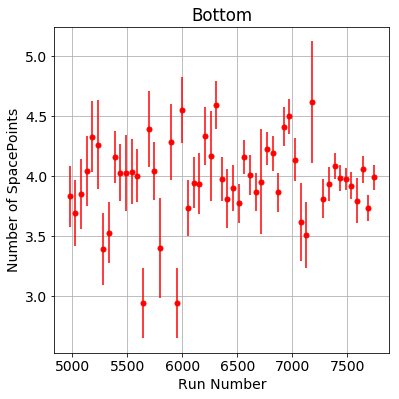

In [122]:
RUN_MIN = df_Event_beam_off_radio['N_Run'].min()
RUN_MAX = df_Event_beam_off_radio['N_Run'].max()

BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/50)#Bin width~10 
#vals,bine = np.histogram(N_event['N_Run'].values,bins=BINS)
#binc = 0.5*(bine[1:]+bine[:-1])
#vals = vals.astype(float)

BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    # implement the code you had before to get EFFICIENCY
    N_event_bottom = (df_Event_beam_off_radio.query('N_Run > %i and N_Run < %i'%(BIN_MIN,BIN_MAX)))
    N_event_bottom_shape= N_event_bottom.shape[0]
    if (N_event_bottom_shape == 0): continue
    N_G10_bottom   = (df_Sps_beam_off_radio.query('(N_Run > %i and N_Run < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10_bottom =N_G10_bottom.query('((sps_y < -90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
    N_G10_bottom_shape = N_G10_bottom.shape[0]
    Rate = N_G10_bottom_shape / float(N_event_bottom_shape)
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_bottom_shape)/N_event_bottom_shape)
fig = plt.figure(figsize=(6,6))
#plt.scatter(BIN_CENTER_V,BIN_EFF_V)
plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data')
#plt.ylim(6,12)
plt.xlabel('Run Number')
plt.ylabel('Number of SpacePoints')
plt.title("Bottom")
#plt.legend(loc=1)
plt.grid()
plt.show()

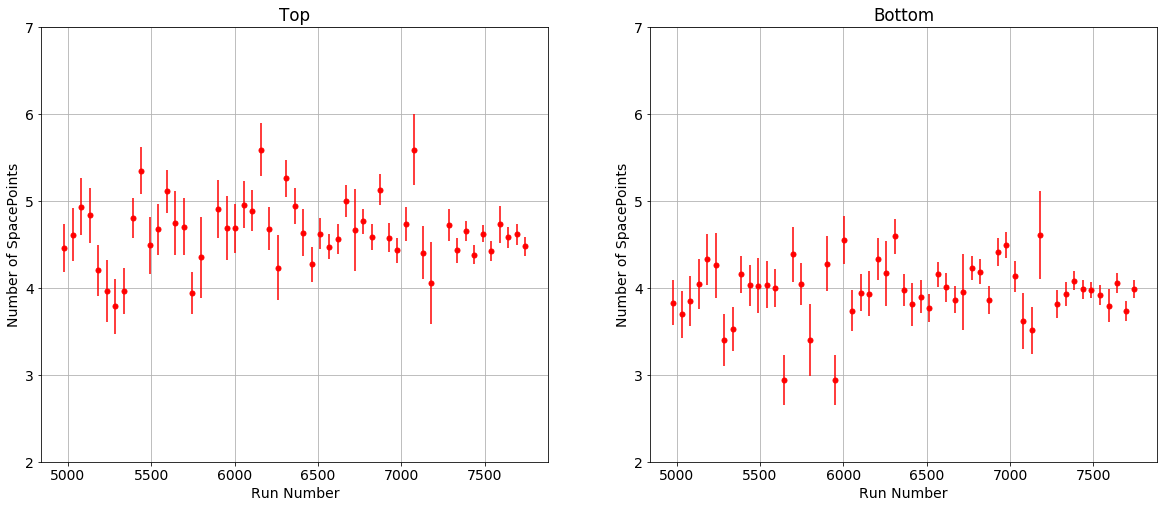

In [123]:
fig = plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
RUN_MIN = df_Event_beam_off_radio['N_Run'].min()
RUN_MAX = df_Event_beam_off_radio['N_Run'].max()

BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/50)#Bin width~10 
#vals,bine = np.histogram(N_event['N_Run'].values,bins=BINS)
#binc = 0.5*(bine[1:]+bine[:-1])
#vals = vals.astype(float)

BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    # implement the code you had before to get EFFICIENCY
    N_event_top = (df_Event_beam_off_radio.query('N_Run > %i and N_Run < %i'%(BIN_MIN,BIN_MAX)))
    N_event_top_shape= N_event_top.shape[0]
    if (N_event_top_shape == 0): continue
    N_G10_top   = (df_Sps_beam_off_radio.query('(N_Run > %i and N_Run < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10_top =N_G10_top.query('((sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
    N_G10_top_shape =N_G10_top.shape[0]
    Rate = N_G10_top_shape / float(N_event_top_shape)
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_top_shape)/N_event_top_shape)

#plt.scatter(BIN_CENTER_V,BIN_EFF_V)
plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data')
plt.ylim(2,7)
plt.xlabel('Run Number')
plt.ylabel('Number of SpacePoints')
plt.title("Top")
#plt.legend(loc=1)
plt.grid()

plt.subplot(1, 2, 2)
RUN_MIN = df_Event_beam_off_radio['N_Run'].min()
RUN_MAX = df_Event_beam_off_radio['N_Run'].max()

BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/50)#Bin width~10 
#vals,bine = np.histogram(N_event['N_Run'].values,bins=BINS)
#binc = 0.5*(bine[1:]+bine[:-1])
#vals = vals.astype(float)

BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    # implement the code you had before to get EFFICIENCY
    N_event_bottom = (df_Event_beam_off_radio.query('N_Run > %i and N_Run < %i'%(BIN_MIN,BIN_MAX)))
    N_event_bottom_shape= N_event_bottom.shape[0]
    if (N_event_bottom_shape == 0): continue
    N_G10_bottom   = (df_Sps_beam_off_radio.query('(N_Run > %i and N_Run < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10_bottom =N_G10_bottom.query('((sps_y < -90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
    N_G10_bottom_shape = N_G10_bottom.shape[0]
    Rate = N_G10_bottom_shape / float(N_event_bottom_shape)
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_bottom_shape)/N_event_bottom_shape)

#plt.scatter(BIN_CENTER_V,BIN_EFF_V)
plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data')
plt.ylim(2,7)
plt.xlabel('Run Number')
plt.ylabel('Number of SpacePoints')
plt.title("Bottom")
#plt.legend(loc=1)
plt.grid()
plt.show()

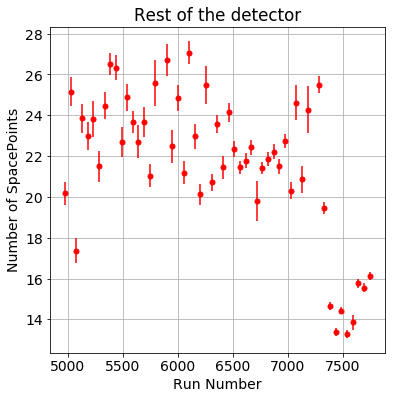

In [124]:
RUN_MIN = df_Event_beam_off_radio['N_Run'].min()
RUN_MAX = df_Event_beam_off_radio['N_Run'].max()

BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/50)#Bin width~10 
#vals,bine = np.histogram(N_event['N_Run'].values,bins=BINS)
#binc = 0.5*(bine[1:]+bine[:-1])
#vals = vals.astype(float)

BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    # implement the code you had before to get EFFICIENCY
    N_event_bottom = (df_Event_beam_off_radio.query('N_Run > %i and N_Run < %i'%(BIN_MIN,BIN_MAX)))
    N_event_bottom_shape= N_event_bottom.shape[0]
    if (N_event_bottom_shape == 0): continue
    N_G10_bottom   = (df_rest_det_off_cut.query('(N_Run > %i and N_Run < %i) '%(BIN_MIN,BIN_MAX)))
    #N_G10_bottom =N_G10_bottom.query('((sps_y < -90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
    N_G10_bottom_shape = N_G10_bottom.shape[0]
    Rate = N_G10_bottom_shape / float(N_event_bottom_shape)
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_bottom_shape)/N_event_bottom_shape)
fig = plt.figure(figsize=(6,6))
#plt.scatter(BIN_CENTER_V,BIN_EFF_V)
plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data')
# plt.ylim(6,12)
plt.xlabel('Run Number')
plt.ylabel('Number of SpacePoints')
plt.title("Rest of the detector")
#plt.legend(loc=1)
plt.grid()
plt.show()

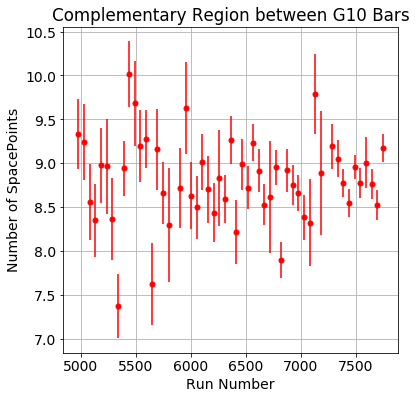

In [125]:


RUN_MIN = df_Event_beam_off_radio['N_Run'].min()
RUN_MAX = df_Event_beam_off_radio['N_Run'].max()

BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/50)#Bin width~10 
#vals,bine = np.histogram(N_event['N_Run'].values,bins=BINS)
#binc = 0.5*(bine[1:]+bine[:-1])
#vals = vals.astype(float)

BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    # implement the code you had before to get EFFICIENCY
    N_event_complementary = (df_Event_beam_off_radio.query('N_Run > %i and N_Run < %i'%(BIN_MIN,BIN_MAX)))
    N_event_complementary_shape= N_event_complementary.shape[0]
    if (N_event_complementary_shape == 0): continue
    N_G10_complementary   = (df_Sps_beam_off_radio.query('(N_Run > %i and N_Run < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10_complementary =N_G10_complementary.query('((sps_y < -90.0 or sps_y > 90.0) and ( (sps_z>50 and sps_z<90) or (sps_z>130 and sps_z<210) or (sps_z>250 and sps_z<320) or (sps_z>360 and sps_z<440) or (sps_z>470 and sps_z<560) or (sps_z>600 and sps_z<660) or (sps_z>700 and sps_z<780) or (sps_z>810 and sps_z<890) or (sps_z>930 and sps_z<990) or (sps_z>1100 ) ))  ')
    N_G10_complementary_shape = N_G10_complementary.shape[0]
    Rate = N_G10_complementary_shape / float(N_event_complementary_shape)
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_complementary_shape)/N_event_complementary_shape)
fig = plt.figure(figsize=(6,6))
#plt.scatter(BIN_CENTER_V,BIN_EFF_V)
plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data')
# plt.ylim(6,12)
plt.xlabel('Run Number')
plt.ylabel('Number of SpacePoints')
plt.title("Complementary Region between G10 Bars")
#plt.legend(loc=1)
plt.grid()
plt.show()

In [126]:
df_Event_beam_off_radio_run3.head()

,evttime,Vertex_x,Vertex_y,Vertex_z,_rand_vtx_x,_rand_vtx_y,_rand_vtx_z,distance_smallest,N_sps,Event_cluster_charge,...,neutrinotracks,muon_px,muon_py,muon_pz,maxTrkLen,tracklength,distance_nu_smallest,cosmic_trk_50,N_Run,N_SubRun
93,1530834923,51.148335,8.229452,512.235474,159.913877,-85.690299,664.566754,17.292118,50,301.431946,...,2,0.293303,0.853365,0.430978,114.731384,257.180128,61.357758,0,17552,175
108,1530905755,133.438721,12.152811,865.425964,207.796890,-106.539605,121.425678,31.635589,41,141.446564,...,2,0.205019,0.933498,0.294191,112.122314,237.288710,76.337079,0,17561,64
422,1530147654,182.222305,20.921387,154.012833,41.708405,-38.266779,980.379445,59.367856,35,764.065979,...,2,-0.664306,-0.576257,-0.476052,245.361725,229.524247,82.090479,0,17451,230
574,1530771742,52.486095,25.914143,225.117844,152.283545,3.536768,340.614314,104.615204,51,387.114594,...,2,-0.262298,-0.625837,0.734525,59.717285,258.899034,77.079910,0,17534,132
609,1529840995,93.794281,20.785036,236.368195,93.693088,-78.692350,473.909989,36.495716,52,223.443207,...,2,-0.155465,0.879206,-0.450364,53.376003,53.376005,54.813685,0,17371,229


In [127]:
df_Sps_beam_off_radio_run3.head()

,evttime,sps_x,sps_y,sps_z,distance,sps_cluster_charge,N_Event,N_Run,N_SubRun,Vertex_x,...,neutrinos,neutrinoshowers,neutrinotracks,muon_px,muon_py,muon_pz,maxTrkLen,tracklength,distance_nu_smallest,cosmic_trk_50
3767,1530834923,175.612778,60.206139,7.704256,522.249675,91.782692,8763,17552,175,51.148335,...,1,0,2,0.293303,0.853365,0.430978,114.731384,257.180128,61.357758,0
3768,1530834923,46.524750,15.172816,12.900000,499.405150,78.897896,8763,17552,175,51.148335,...,1,0,2,0.293303,0.853365,0.430978,114.731384,257.180128,61.357758,0
3769,1530834923,173.663544,-95.938240,68.400002,472.070769,34.213284,8763,17552,175,51.148335,...,1,0,2,0.293303,0.853365,0.430978,114.731384,257.180128,61.357758,0
3770,1530834923,173.418625,-98.536316,72.697678,468.553548,114.374367,8763,17552,175,51.148335,...,1,0,2,0.293303,0.853365,0.430978,114.731384,257.180128,61.357758,0
3771,1530834923,161.446823,81.077347,223.199997,317.827121,46.314617,8763,17552,175,51.148335,...,1,0,2,0.293303,0.853365,0.430978,114.731384,257.180128,61.357758,0


In [128]:
import datetime as dt
timestamp_sec=1463729672
date=dt.datetime.utcfromtimestamp(timestamp_sec)
print date

2016-05-20 07:34:32


In [129]:
import matplotlib.dates as md

In [130]:
import datetime as dt
RUN_MIN = df_Event_beam_off_radio_run3['evttime'].min()
RUN_MAX = df_Event_beam_off_radio_run3['evttime'].max()
fig = plt.figure(figsize=(6,6))
BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/100000)

BIN_time=[]
BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    N_event_run3 = (df_Event_beam_off_radio_run3.query('evttime > %i and evttime < %i'%(BIN_MIN,BIN_MAX)))
    N_event_run3_shape= N_event_run3.shape[0]
    if (N_event_run3_shape == 0): continue
    N_G10_run3   = (df_Sps_beam_off_radio_run3.query('(evttime > %i and evttime < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10_run3 =N_G10_run3.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))')
    N_G10_run3_timestamp=N_G10_run3['evttime'].values
    N_G10_run3_shape = N_G10_run3.shape[0]
    Rate = N_G10_run3_shape / float(N_event_run3_shape)    
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_time.append((N_G10_run3_timestamp))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_run3_shape)/N_event_run3_shape)
    #dates=[dt.datetime.fromtimestamp(N_G10_run3_timestamp)]

<Figure size 432x432 with 0 Axes>

In [131]:
#print BIN_CENTER_V

11
11


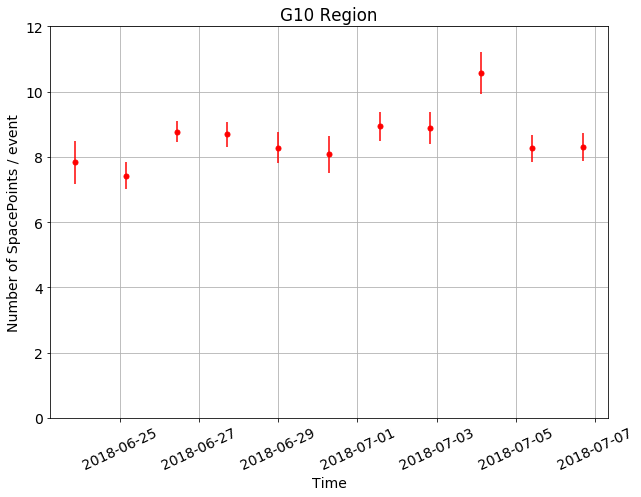

In [132]:
fig = plt.figure(figsize=(10,8))    
df_date_time_run3=pd.to_datetime(BIN_CENTER_V,unit='s')
datenums_run3=md.date2num(df_date_time_run3)
#print df_date_time.shape[0]
#print BIN_EFF_V
#plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data Run 3')
#plt.scatter(BIN_time.values,BIN_EFF_V.values)
# 

print len(datenums_run3)
print len(BIN_EFF_V)

xfmt = md.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(xfmt)

plt.errorbar(datenums_run3,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='Run 3')

plt.xlabel('Time')
plt.ylabel('Number of SpacePoints / event')
plt.title("G10 Region")
#plt.legend(loc=2)
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
plt.ylim(0,12)
plt.grid()
plt.show()
fig.savefig('2018.png', dpi=400)

In [133]:
import datetime as dt
RUN_MIN = df_Event_beam_off_cone['evttime'].min()
RUN_MAX = df_Event_beam_off_cone['evttime'].max()
fig = plt.figure(figsize=(10,8))
BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/500000)

BIN_time=[]
BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    N_event_run1 = (df_Event_beam_off_cone.query('evttime > %i and evttime < %i'%(BIN_MIN,BIN_MAX)))
    N_event_run1_shape= N_event_run1.shape[0]
    if (N_event_run1_shape == 0): continue
    N_G10_run1   = (df_Sps_beam_off_cone.query('(evttime > %i and evttime < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10_run1 =N_G10_run1.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))')
    N_G10_run1_timestamp=N_G10_run1['evttime'].values
    N_G10_run1_shape = N_G10_run1.shape[0]
    Rate = N_G10_run1_shape / float(N_event_run1_shape)    
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_time.append((N_G10_run1_timestamp))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_run1_shape)/N_event_run1_shape)
    #dates=[dt.datetime.fromtimestamp(N_G10_run3_timestamp)]
    
    


<Figure size 720x576 with 0 Axes>

37
37


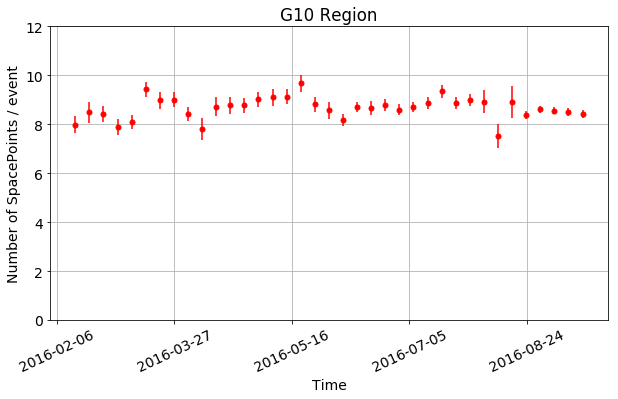

In [134]:
fig = plt.figure(figsize=(10,6))    
df_date_time_run1=pd.to_datetime(BIN_CENTER_V,unit='s')
datenums_run1=md.date2num(df_date_time_run1)
#print df_date_time.shape[0]
#print BIN_EFF_V
#plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data Run 3')
#plt.scatter(BIN_time.values,BIN_EFF_V.values)
# plt.ylim(6,12)

print len(datenums_run1)
print len(BIN_EFF_V)

xfmt = md.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(xfmt)

plt.errorbar(datenums_run1,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='Run 1')

plt.xlabel('Time')
plt.ylabel('Number of SpacePoints / event')
plt.title("G10 Region")
#plt.legend(loc=2)
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
plt.ylim(0,12)
plt.grid()
plt.show()
fig.savefig('2016.png', dpi=400)

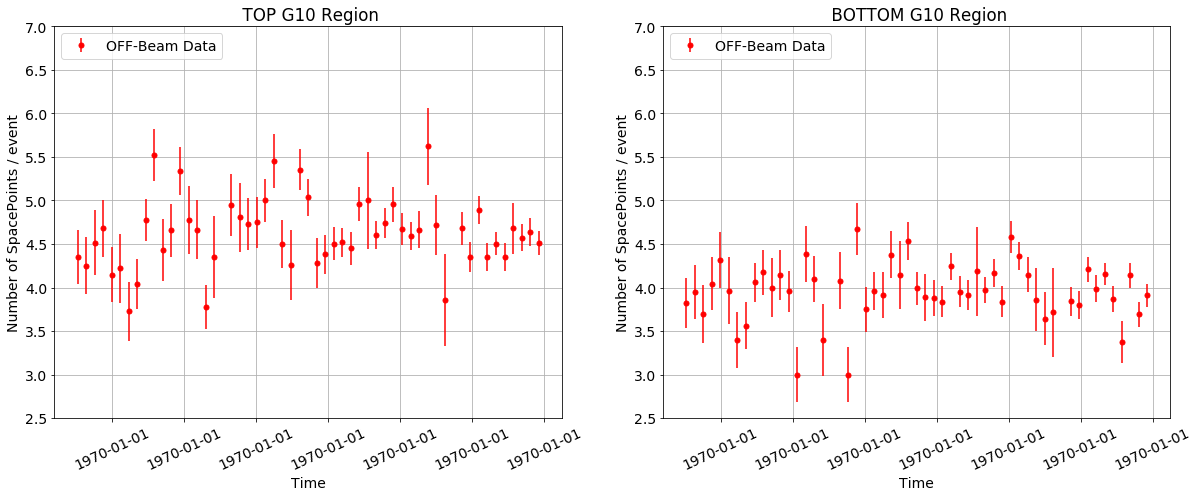

In [135]:
fig = plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
RUN_MIN_top = df_Event_beam_off_cone['N_Run'].min()
RUN_MAX_top = df_Event_beam_off_cone['N_Run'].max()

BINS_top=np.linspace(RUN_MIN_top,RUN_MAX_top,(RUN_MAX_top-RUN_MIN_top)/50)#Bin width~10 
#vals,bine = np.histogram(N_event['N_Run'].values,bins=BINS)
#binc = 0.5*(bine[1:]+bine[:-1])
#vals = vals.astype(float)
BIN_time_top=[]
BIN_CENTER_V_top = []
BIN_EFF_V_top = []
BIN_ERR_V_top=[]
for n in xrange(len(BINS_top)-1):
    BIN_MIN_top = BINS_top[n]
    BIN_MAX_top = BINS_top[n+1]
    # implement the code you had before to get EFFICIENCY
    N_event_top = (df_Event_beam_off_cone.query('N_Run > %i and N_Run < %i'%(BIN_MIN_top,BIN_MAX_top)))
    N_event_top_shape= N_event_top.shape[0]
    if (N_event_top_shape == 0): continue
    N_G10_top   = (df_Sps_beam_off_cone.query('(N_Run > %i and N_Run < %i) '%(BIN_MIN_top,BIN_MAX_top)))
    N_G10_top =N_G10_top.query('((sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
    N_G10_top_timestamp=N_G10_top['evttime'].values
    N_G10_top_shape =N_G10_top.shape[0]
    Rate_top = N_G10_top_shape / float(N_event_top_shape)
    BIN_CENTER_V_top.append(0.5*(BIN_MIN_top+BIN_MAX_top))
    BIN_EFF_V_top.append(Rate_top)
    BIN_ERR_V_top.append(math.sqrt(N_G10_top_shape)/N_event_top_shape)
    BIN_time_top.append((N_G10_top_timestamp))


df_date_time_top=pd.to_datetime(BIN_CENTER_V_top,unit='s')
datenums_top=md.date2num(df_date_time_top)    
#plt.scatter(BIN_CENTER_V,BIN_EFF_V)
#print datenums_top
xfmt_top = md.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(xfmt_top)


plt.errorbar(datenums_top,BIN_EFF_V_top,yerr=BIN_ERR_V_top,fmt='o',color='r',markersize=5,label='OFF-Beam Data')

plt.xlabel('Time')
plt.ylabel('Number of SpacePoints / event')
plt.title(" TOP G10 Region")
plt.legend(loc=2)
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
#plt.legend(loc=1)
plt.ylim(2.5,7)
plt.grid()

plt.subplot(1, 2, 2)
RUN_MIN_bottom = df_Event_beam_off_cone['N_Run'].min()
RUN_MAX_bottom = df_Event_beam_off_cone['N_Run'].max()

BINS_bottom=np.linspace(RUN_MIN_bottom,RUN_MAX_bottom,(RUN_MAX_bottom-RUN_MIN_bottom)/50)#Bin width~10 
#vals,bine = np.histogram(N_event['N_Run'].values,bins=BINS)
#binc = 0.5*(bine[1:]+bine[:-1])
#vals = vals.astype(float)
BIN_time_bottom=[]
BIN_CENTER_V_bottom = []
BIN_EFF_V_bottom = []
BIN_ERR_V_bottom=[]
for m in xrange(len(BINS_bottom)-1):
    BIN_MIN_bottom = BINS_bottom[m]
    BIN_MAX_bottom = BINS_bottom[m+1]
    # implement the code you had before to get EFFICIENCY
    N_event_bottom = (df_Event_beam_off_cone.query('N_Run > %i and N_Run < %i'%(BIN_MIN_bottom,BIN_MAX_bottom)))
    N_event_bottom_shape= N_event_bottom.shape[0]
    if (N_event_bottom_shape == 0): continue
    N_G10_bottom   = (df_Sps_beam_off_cone.query('(N_Run > %i and N_Run < %i) '%(BIN_MIN_bottom,BIN_MAX_bottom)))
    N_G10_bottom =N_G10_bottom.query('((sps_y < -90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
    N_G10_bottom_timestamp=N_G10_bottom['evttime'].values
    N_G10_bottom_shape = N_G10_bottom.shape[0]
    Rate_bottom = N_G10_bottom_shape / float(N_event_bottom_shape)
    BIN_CENTER_V_bottom.append(0.5*(BIN_MIN_bottom+BIN_MAX_bottom))
    BIN_EFF_V_bottom.append(Rate_bottom)
    BIN_ERR_V_bottom.append(math.sqrt(N_G10_bottom_shape)/N_event_bottom_shape)
    BIN_time_bottom.append((N_G10_bottom_timestamp))
#plt.scatter(BIN_CENTER_V,BIN_EFF_V)

#print BIN_time_bottom
df_date_time_bottom=pd.to_datetime(BIN_CENTER_V_bottom,unit='s')
datenums_bottom=md.date2num(df_date_time_bottom)    
#plt.scatter(BIN_CENTER_V,BIN_EFF_V)

xfmt_bottom = md.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(xfmt_bottom)


plt.errorbar(datenums_bottom,BIN_EFF_V_bottom,yerr=BIN_ERR_V_bottom,fmt='o',color='r',markersize=5,label='OFF-Beam Data')

plt.xlabel('Time')
plt.ylabel('Number of SpacePoints / event')
plt.title(" BOTTOM G10 Region")
plt.legend(loc=2)
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
plt.grid()
plt.ylim(2.5,7)
plt.show()

180
180


<Figure size 432x432 with 0 Axes>

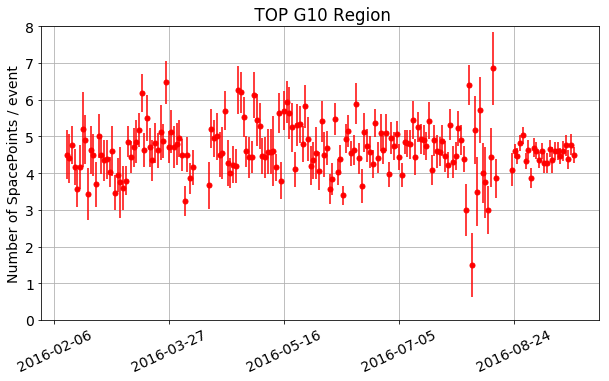

In [136]:
import datetime as dt
RUN_MIN = df_Event_beam_off_cone['evttime'].min()
RUN_MAX = df_Event_beam_off_cone['evttime'].max()
fig = plt.figure(figsize=(6,6))
BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/100000)

BIN_time=[]
BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    N_event_run1 = (df_Event_beam_off_cone.query('evttime > %i and evttime < %i'%(BIN_MIN,BIN_MAX)))
    N_event_run1_shape= N_event_run1.shape[0]
    if (N_event_run1_shape == 0): continue
    N_G10_run1   = (df_Sps_beam_off_cone.query('(evttime > %i and evttime < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10_run1 =N_G10_run1.query('((sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
    N_G10_run1_timestamp=N_G10_run1['evttime'].values
    N_G10_run1_shape = N_G10_run1.shape[0]
    Rate = N_G10_run1_shape / float(N_event_run1_shape)    
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_time.append((N_G10_run1_timestamp))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_run1_shape)/N_event_run1_shape)
    #dates=[dt.datetime.fromtimestamp(N_G10_run3_timestamp)]
    
    
fig = plt.figure(figsize=(10,6))    
df_date_time_run1=pd.to_datetime(BIN_CENTER_V,unit='s')
datenums_run1=md.date2num(df_date_time_run1)
#print df_date_time.shape[0]
#print BIN_EFF_V
#plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data Run 3')
#plt.scatter(BIN_time.values,BIN_EFF_V.values)
# plt.ylim(6,12)

print len(datenums_run1)
print len(BIN_EFF_V)

xfmt = md.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(xfmt)

plt.errorbar(datenums_run1,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data Run 1')

#plt.xlabel('UTC Time Stamp (s)')
plt.ylabel('Number of SpacePoints / event')
plt.title(" TOP G10 Region")
#plt.legend(loc=2)
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
plt.ylim(0,8)
plt.grid()
plt.show()
fig.savefig('Top.png', dpi=400)

180
180


<Figure size 432x432 with 0 Axes>

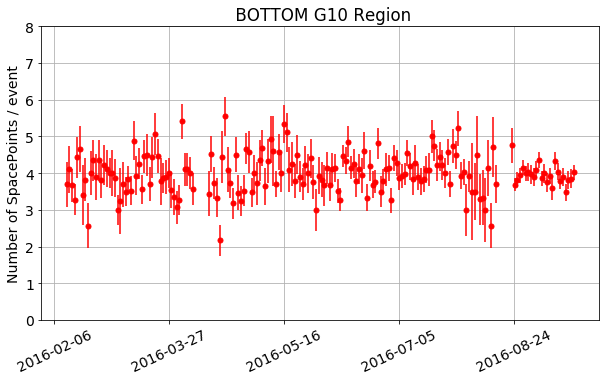

In [137]:
import datetime as dt
RUN_MIN = df_Event_beam_off_cone['evttime'].min()
RUN_MAX = df_Event_beam_off_cone['evttime'].max()
fig = plt.figure(figsize=(6,6))
BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/100000)

BIN_time=[]
BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    N_event_run1 = (df_Event_beam_off_cone.query('evttime > %i and evttime < %i'%(BIN_MIN,BIN_MAX)))
    N_event_run1_shape= N_event_run1.shape[0]
    if (N_event_run1_shape == 0): continue
    N_G10_run1   = (df_Sps_beam_off_cone.query('(evttime > %i and evttime < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10_run1 =N_G10_run1.query('((sps_y < -90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
    N_G10_run1_timestamp=N_G10_run1['evttime'].values
    N_G10_run1_shape = N_G10_run1.shape[0]
    Rate = N_G10_run1_shape / float(N_event_run1_shape)    
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_time.append((N_G10_run1_timestamp))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_run1_shape)/N_event_run1_shape)
    #dates=[dt.datetime.fromtimestamp(N_G10_run3_timestamp)]
    
    
fig = plt.figure(figsize=(10,6))    
df_date_time_run1=pd.to_datetime(BIN_CENTER_V,unit='s')
datenums_run1=md.date2num(df_date_time_run1)
#print df_date_time.shape[0]
#print BIN_EFF_V
#plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data Run 3')
#plt.scatter(BIN_time.values,BIN_EFF_V.values)
# plt.ylim(6,12)

print len(datenums_run1)
print len(BIN_EFF_V)

xfmt = md.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(xfmt)

plt.errorbar(datenums_run1,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data Run 1')

#plt.xlabel('UTC Time Stamp (s)')
plt.ylabel('Number of SpacePoints / event')
plt.title(" BOTTOM G10 Region")
#plt.legend(loc=2)
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
plt.ylim(0,8)
plt.grid()
plt.show()
fig.savefig('Bottom.png', dpi=400)